In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
train = pd.read_csv("train.csv")

In [4]:
trainX = train.iloc[:, 0:len(train.columns)-1]
trainY = train.loc[:, 'target']
trainX = pd.get_dummies(trainX)

Cat 1 is nominal, 5 Levels
Cat 2 is nominal, 12 levels

The rest up to Cat 26 are binary
    A LOT of these are False heavy, near or above 90%

Make training splits

In [4]:
train_X, val_X, labels_train, labels_val = train_test_split(trainX, trainY, test_size = 0.25, random_state = 42)

In [5]:
feature_list = list(train_X.columns)

In [60]:
# The baseline predictions are the historical averages
baseline_preds = labels_val.mean()
# Baseline errors, and display average baseline error
baseline_errors = abs(labels_val - baseline_preds)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  0.94


RF

In [6]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_X, labels_train);

In [8]:
# Use the forest's predict method on the test data
predictions = rf.predict(val_X)
# Calculate the absolute errors
errors = abs(predictions - labels_val)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.95


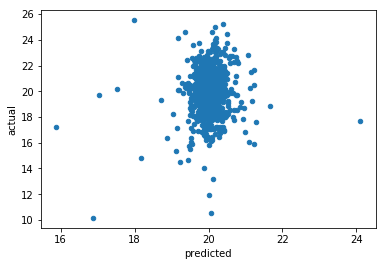

In [75]:
rf_performance = pd.DataFrame({"predicted": predictions, "actual": labels_val })
rf_performance.plot(x='predicted', y='actual', kind='scatter')

In [9]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: num58                Importance: 0.04
Variable: num1                 Importance: 0.03
Variable: num3                 Importance: 0.03
Variable: num5                 Importance: 0.03
Variable: num18                Importance: 0.03
Variable: num19                Importance: 0.03
Variable: num20                Importance: 0.03
Variable: num21                Importance: 0.03
Variable: num22                Importance: 0.03
Variable: num23                Importance: 0.03
Variable: num32                Importance: 0.03
Variable: num2                 Importance: 0.02
Variable: num4                 Importance: 0.02
Variable: num6                 Importance: 0.02
Variable: num7                 Importance: 0.02
Variable: num11                Importance: 0.02
Variable: num14                Importance: 0.02
Variable: num16                Importance: 0.02
Variable: num17                Importance: 0.02
Variable: num24                Importance: 0.02
Variable: num25                Importanc

In [10]:
fs = pd.Series([pair[0] for pair in feature_importances])
fs_score = pd.Series([pair[1] for pair in feature_importances])

final_features = fs[fs_score != 0.0 ]

Vanilla OLS

In [77]:
from sklearn.linear_model import Lasso

lasso_fit = Lasso(alpha=0.5)

In [79]:
lasso_fit = lasso_fit.fit(train_X, labels_train)

In [81]:
# Use the forest's predict method on the test data
predictions = lasso_fit.predict(val_X)
# Calculate the absolute errors
errors = abs(predictions - labels_val)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.94


In [83]:
coef = lasso_fit.coef_

In [85]:
train_X.columns[coef != 0]

Index(['num1', 'num30', 'num33', 'num37', 'num38', 'num59'], dtype='object')

In [117]:
from sklearn.linear_model import LinearRegression

In [124]:
train_X.loc[:,final_features].shape

(4762, 59)

In [125]:
val_X.shape

(1588, 100)

In [140]:
train_X2 = train_X.loc[:, final_features]**2

In [141]:
train_X2.head()

,num58,num1,num3,num5,num18,num19,num20,num21,num22,num23,...,num48,num49,num50,num51,num52,num53,num54,num55,num56,num57
3426,0.057599,6.201544e+04,0.040002,0.000010,0.122499,0.000000,0.562500,1.254389,0.022501,19.802473,...,9976.391950,1.775793,2157.828253,1623.706367,3.817839,0.130452,449.893370,9976.391950,1.775793,2157.828253
1173,0.108901,8.480402e+05,0.336385,0.000001,0.108901,0.032397,0.072894,0.136896,0.022503,1.512890,...,19947.409888,16.973803,14546.707187,1867.814208,15.783310,15.181437,11969.359781,19947.409888,16.973803,14546.707187
5292,4.622509,1.766483e+06,3.385585,0.000518,0.774407,1.988089,0.688903,0.052902,0.608397,14.822546,...,2.445217,0.929808,273.045550,2343.085653,0.481415,0.074846,304.950432,2.445217,0.929808,273.045550
1561,0.352480,1.641060e+01,0.265841,0.000410,0.451451,0.079074,0.000243,0.015625,0.079129,1.031447,...,26055.254335,17.265704,22463.063249,1579.068010,19.373704,19.889190,21791.825153,26055.254335,17.265704,22463.063249
4252,0.057599,4.640018e+04,1.932097,0.000236,6.002520,0.722497,7.398405,0.160002,0.090002,20.070427,...,15874.941618,30.610349,30621.745086,3984.768150,34.203642,24.091105,34370.193664,15874.941618,30.610349,30621.745086


In [138]:
lin = LinearRegression().fit(X=train_X.loc[:,final_features], y=labels_train)

In [139]:
predictions = lin.predict(val_X.loc[:,final_features])
errors = abs(predictions - labels_val)
print("MAE: ", round(np.mean(errors), 2))


MAE:  0.95


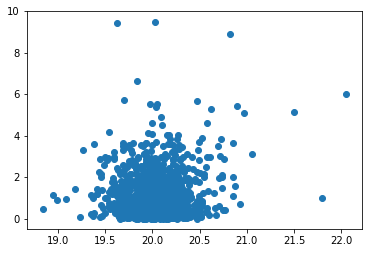

In [135]:
plt.scatter(x=predictions, y=errors, kind='scatter')

Deep Learning???

In [11]:
final_features.shape

(59,)

In [67]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm
# create model
def baselinemodel():
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(59,)))
    model.add(Dense(90, kernel_initializer='normal', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(120, activation='relu', kernel_initializer='normal',  kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(80, activation='relu', kernel_initializer='normal', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(30, activation='relu', kernel_initializer='normal', kernel_constraint=maxnorm(3)))
    model.add(Dense(1, kernel_initializer='normal'))
    sgd = SGD(lr=0.1, momentum=0.9, decay=0.01)
    model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['mean_absolute_error'])
    return model


In [51]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm
# create model
def baselinemodel():
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(59,)))
    model.add(Dense(90, kernel_initializer='normal', activation='relu', kernel_constraint=maxnorm(4)))
    model.add(Dropout(0.2))
    model.add(Dense(120, activation='relu', kernel_initializer='normal',  kernel_constraint=maxnorm(4)))
    model.add(Dropout(0.2))
    model.add(Dense(80, activation='relu', kernel_initializer='normal', kernel_constraint=maxnorm(4)))
    model.add(Dropout(0.2))
    model.add(Dense(30, activation='relu', kernel_initializer='normal', kernel_constraint=maxnorm(4)))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal'))
    sgd = SGD(lr=0.09, momentum=0.8, decay=0.00)
    model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['mean_absolute_error'])
    return model


C:\Users\Christopher\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [115]:
# evaluate model with standardized dataset
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baselinemodel, epochs=500, verbose=True)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=3, random_state=seed)
results = cross_val_score(pipeline, np.array(train_X.loc[:,final_features]), np.array(labels_train), cv=kfold)
print("Standardized: %.2f (%.2f) MAE" % (results.mean(), results.std()))

Epoch 1/500
3174/3174 [==============================] - 13s 4ms/step - loss: nan - mean_absolute_error: nan
Epoch 2/500
3174/3174 [==============================] - 1s 410us/step - loss: nan - mean_absolute_error: nan
Epoch 3/500
3174/3174 [==============================] - 1s 440us/step - loss: nan - mean_absolute_error: nan
Epoch 4/500
3174/3174 [==============================] - 1s 435us/step - loss: nan - mean_absolute_error: nan
Epoch 5/500
3174/3174 [==============================] - 1s 410us/step - loss: nan - mean_absolute_error: nan
Epoch 6/500
3174/3174 [==============================] - 1s 404us/step - loss: nan - mean_absolute_error: nan
Epoch 7/500
3174/3174 [==============================] - 1s 409us/step - loss: nan - mean_absolute_error: nan
Epoch 8/500
3174/3174 [==============================] - 1s 414us/step - loss: nan - mean_absolute_error: nan
Epoch 9/500
3174/3174 [==============================] - 1s 410us/step - loss: nan - mean_absolute_error: nan
Epoch 10/50

3174/3174 [==============================] - 1s 408us/step - loss: nan - mean_absolute_error: nan
Epoch 148/500
3174/3174 [==============================] - 1s 405us/step - loss: nan - mean_absolute_error: nan
Epoch 149/500
3174/3174 [==============================] - 1s 395us/step - loss: nan - mean_absolute_error: nan
Epoch 150/500
3174/3174 [==============================] - 1s 400us/step - loss: nan - mean_absolute_error: nan
Epoch 151/500
3174/3174 [==============================] - 1s 406us/step - loss: nan - mean_absolute_error: nan
Epoch 152/500
3174/3174 [==============================] - 1s 400us/step - loss: nan - mean_absolute_error: nan
Epoch 153/500
3174/3174 [==============================] - 1s 395us/step - loss: nan - mean_absolute_error: nan
Epoch 154/500
3174/3174 [==============================] - 1s 406us/step - loss: nan - mean_absolute_error: nan
Epoch 155/500
3174/3174 [==============================] - 1s 409us/step - loss: nan - mean_absolute_error: nan
Epoch 

3174/3174 [==============================] - 1s 398us/step - loss: nan - mean_absolute_error: nan
Epoch 294/500
3174/3174 [==============================] - 1s 400us/step - loss: nan - mean_absolute_error: nan
Epoch 295/500
3174/3174 [==============================] - 1s 405us/step - loss: nan - mean_absolute_error: nan
Epoch 296/500
3174/3174 [==============================] - 1s 398us/step - loss: nan - mean_absolute_error: nan
Epoch 297/500
3174/3174 [==============================] - 1s 398us/step - loss: nan - mean_absolute_error: nan
Epoch 298/500
3174/3174 [==============================] - 1s 399us/step - loss: nan - mean_absolute_error: nan
Epoch 299/500
3174/3174 [==============================] - 1s 401us/step - loss: nan - mean_absolute_error: nan
Epoch 300/500
3174/3174 [==============================] - 1s 397us/step - loss: nan - mean_absolute_error: nan
Epoch 301/500
3174/3174 [==============================] - 1s 395us/step - loss: nan - mean_absolute_error: nan
Epoch 

3174/3174 [==============================] - 1s 398us/step - loss: nan - mean_absolute_error: nan
Epoch 438/500
3174/3174 [==============================] - 1s 409us/step - loss: nan - mean_absolute_error: nan
Epoch 439/500
3174/3174 [==============================] - 1s 400us/step - loss: nan - mean_absolute_error: nan
Epoch 440/500
3174/3174 [==============================] - 1s 395us/step - loss: nan - mean_absolute_error: nan
Epoch 441/500
3174/3174 [==============================] - 1s 398us/step - loss: nan - mean_absolute_error: nan
Epoch 442/500
3174/3174 [==============================] - 1s 426us/step - loss: nan - mean_absolute_error: nan
Epoch 443/500
3174/3174 [==============================] - 2s 474us/step - loss: nan - mean_absolute_error: nan
Epoch 444/500
3174/3174 [==============================] - 1s 463us/step - loss: nan - mean_absolute_error: nan
Epoch 445/500
3174/3174 [==============================] - 1s 405us/step - loss: nan - mean_absolute_error: nan
Epoch 

3175/3175 [==============================] - 1s 409us/step - loss: 2.1115 - mean_absolute_error: 0.9793
Epoch 80/500
3175/3175 [==============================] - 1s 403us/step - loss: 2.1136 - mean_absolute_error: 0.9820
Epoch 81/500
3175/3175 [==============================] - 1s 397us/step - loss: 2.0985 - mean_absolute_error: 0.9753
Epoch 82/500
3175/3175 [==============================] - 1s 403us/step - loss: 2.1020 - mean_absolute_error: 0.9760
Epoch 83/500
3175/3175 [==============================] - 1s 407us/step - loss: 2.0954 - mean_absolute_error: 0.9748
Epoch 84/500
3175/3175 [==============================] - 1s 400us/step - loss: 2.1111 - mean_absolute_error: 0.9807
Epoch 85/500
3175/3175 [==============================] - 1s 401us/step - loss: 2.1037 - mean_absolute_error: 0.9802
Epoch 86/500
3175/3175 [==============================] - 1s 400us/step - loss: 2.1036 - mean_absolute_error: 0.9727
Epoch 87/500
3175/3175 [==============================] - 1s 406us/step - los

3175/3175 [==============================] - 1s 409us/step - loss: 2.1140 - mean_absolute_error: 0.9789
Epoch 218/500
3175/3175 [==============================] - 1s 404us/step - loss: 2.0945 - mean_absolute_error: 0.9775
Epoch 219/500
3175/3175 [==============================] - 1s 413us/step - loss: 2.1022 - mean_absolute_error: 0.9722
Epoch 220/500
3175/3175 [==============================] - 1s 408us/step - loss: 2.1119 - mean_absolute_error: 0.9760
Epoch 221/500
3175/3175 [==============================] - 1s 411us/step - loss: 2.0930 - mean_absolute_error: 0.9719
Epoch 222/500
3175/3175 [==============================] - 1s 402us/step - loss: 2.1055 - mean_absolute_error: 0.9792
Epoch 223/500
3175/3175 [==============================] - 1s 402us/step - loss: 2.1134 - mean_absolute_error: 0.9768
Epoch 224/500
3175/3175 [==============================] - 1s 404us/step - loss: 2.0940 - mean_absolute_error: 0.9700
Epoch 225/500
3175/3175 [==============================] - 1s 409us/st

3175/3175 [==============================] - 1s 403us/step - loss: 2.1047 - mean_absolute_error: 0.9767
Epoch 355/500
3175/3175 [==============================] - 1s 406us/step - loss: 2.1332 - mean_absolute_error: 0.9905
Epoch 356/500
3175/3175 [==============================] - 1s 407us/step - loss: 2.1024 - mean_absolute_error: 0.9756
Epoch 357/500
3175/3175 [==============================] - 1s 403us/step - loss: 2.0923 - mean_absolute_error: 0.9726
Epoch 358/500
3175/3175 [==============================] - 1s 402us/step - loss: 2.1167 - mean_absolute_error: 0.9859
Epoch 359/500
3175/3175 [==============================] - 1s 408us/step - loss: 2.1015 - mean_absolute_error: 0.9796
Epoch 360/500
3175/3175 [==============================] - 1s 404us/step - loss: 2.1089 - mean_absolute_error: 0.9810
Epoch 361/500
3175/3175 [==============================] - 1s 403us/step - loss: 2.0913 - mean_absolute_error: 0.9733
Epoch 362/500
3175/3175 [==============================] - 1s 409us/st

Epoch 492/500
3175/3175 [==============================] - 1s 403us/step - loss: 2.1041 - mean_absolute_error: 0.9771
Epoch 493/500
3175/3175 [==============================] - 1s 405us/step - loss: 2.1052 - mean_absolute_error: 0.9751
Epoch 494/500
3175/3175 [==============================] - 1s 406us/step - loss: 2.1010 - mean_absolute_error: 0.9793
Epoch 495/500
3175/3175 [==============================] - 1s 402us/step - loss: 2.0869 - mean_absolute_error: 0.9671
Epoch 496/500
3175/3175 [==============================] - 1s 403us/step - loss: 2.1153 - mean_absolute_error: 0.9782
Epoch 497/500
3175/3175 [==============================] - 1s 407us/step - loss: 2.0999 - mean_absolute_error: 0.9737
Epoch 498/500
3175/3175 [==============================] - 1s 409us/step - loss: 2.1251 - mean_absolute_error: 0.9821
Epoch 499/500
3175/3175 [==============================] - 1s 401us/step - loss: 2.1001 - mean_absolute_error: 0.9742
Epoch 500/500
1587/1587 [==============================]

3175/3175 [==============================] - 1s 417us/step - loss: nan - mean_absolute_error: nan
Epoch 138/500
3175/3175 [==============================] - 1s 414us/step - loss: nan - mean_absolute_error: nan
Epoch 139/500
3175/3175 [==============================] - 1s 409us/step - loss: nan - mean_absolute_error: nan
Epoch 140/500
3175/3175 [==============================] - 1s 412us/step - loss: nan - mean_absolute_error: nan
Epoch 141/500
3175/3175 [==============================] - 1s 411us/step - loss: nan - mean_absolute_error: nan
Epoch 142/500
3175/3175 [==============================] - 1s 411us/step - loss: nan - mean_absolute_error: nan
Epoch 143/500
3175/3175 [==============================] - 1s 414us/step - loss: nan - mean_absolute_error: nan
Epoch 144/500
3175/3175 [==============================] - 1s 425us/step - loss: nan - mean_absolute_error: nan
Epoch 145/500
3175/3175 [==============================] - 1s 411us/step - loss: nan - mean_absolute_error: nan
Epoch 

3175/3175 [==============================] - 1s 411us/step - loss: nan - mean_absolute_error: nan
Epoch 284/500
3175/3175 [==============================] - 1s 407us/step - loss: nan - mean_absolute_error: nan
Epoch 285/500
3175/3175 [==============================] - 1s 411us/step - loss: nan - mean_absolute_error: nan
Epoch 286/500
3175/3175 [==============================] - 1s 424us/step - loss: nan - mean_absolute_error: nan
Epoch 287/500
3175/3175 [==============================] - 1s 406us/step - loss: nan - mean_absolute_error: nan
Epoch 288/500
3175/3175 [==============================] - 1s 406us/step - loss: nan - mean_absolute_error: nan
Epoch 289/500
3175/3175 [==============================] - 1s 415us/step - loss: nan - mean_absolute_error: nan
Epoch 290/500
3175/3175 [==============================] - 1s 412us/step - loss: nan - mean_absolute_error: nan
Epoch 291/500
3175/3175 [==============================] - 1s 404us/step - loss: nan - mean_absolute_error: nan
Epoch 

3175/3175 [==============================] - 1s 413us/step - loss: nan - mean_absolute_error: nan
Epoch 430/500
3175/3175 [==============================] - 1s 410us/step - loss: nan - mean_absolute_error: nan
Epoch 431/500
3175/3175 [==============================] - 1s 409us/step - loss: nan - mean_absolute_error: nan
Epoch 432/500
3175/3175 [==============================] - 1s 413us/step - loss: nan - mean_absolute_error: nan
Epoch 433/500
3175/3175 [==============================] - 1s 418us/step - loss: nan - mean_absolute_error: nan
Epoch 434/500
3175/3175 [==============================] - 1s 407us/step - loss: nan - mean_absolute_error: nan
Epoch 435/500
3175/3175 [==============================] - 1s 414us/step - loss: nan - mean_absolute_error: nan
Epoch 436/500
3175/3175 [==============================] - 1s 406us/step - loss: nan - mean_absolute_error: nan
Epoch 437/500
3175/3175 [==============================] - 1s 429us/step - loss: nan - mean_absolute_error: nan
Epoch 

In [116]:
results

array([        nan, -2.09910261,         nan])

# Standardize Inputs and Target

Continuous predictors need to be standardized. We can look at a Range Standarization or a statistical standardization

In [22]:
def range_std(column):
    return (column - column.min())/(column.max() - column.min())

In [108]:
train_std = pd.get_dummies(train)

In [109]:
num_columns = list(train_std.columns[0:59])
num_columns.append('target')

In [110]:
for column_name in num_columns:
    train_std[column_name] = range_std(train_std[column_name])

In [117]:
trainY = train_std.loc[:, 'target']
trainX = train_std.drop(columns='target')

Need to calculate the "baseline" prediction - a.k.a. the error if we just guessed the average of the target column

In [182]:
range_mae = abs(trainY - trainY.mean()).mean()
range_mse = ((trainY - trainY.mean())**2).mean()

Only use the columns that the test data set has

In [101]:
validation_df = pd.read_csv("test.csv").iloc[:, 1:]
validation_df = pd.get_dummies(validation_df)
len(validation_df.columns)

92

In [126]:
unneeded_columns = []
valid_columns = []
for column_name in trainX.columns:
    if column_name not in validation_df.columns:
        unneeded_columns.append(column_name)
    else:
        valid_columns.append(column_name)

In [128]:
trainX = trainX.loc[:, valid_columns]
len(trainX.columns)

92

## Try Simple NN

In [153]:
def simplemodel():
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(92,)))
    model.add(Dense(100, kernel_initializer='normal', activation='relu', kernel_constraint=maxnorm(4)))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal'))
    sgd = SGD(lr=0.09, momentum=0.8, decay=0.00)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
    return model

In [156]:
# evaluate model with standardized dataset
seed = 12345
np.random.seed(seed)
estimators = []
estimators.append(('mlp', KerasRegressor(build_fn=simplemodel, epochs=100, verbose=True)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=5, random_state=seed)
results = cross_val_score(pipeline, np.array(trainX), np.array(trainY), cv=kfold)
print("Standardized: %.2f (%.2f) MAE" % (results.mean(), results.std()))

Epoch 1/100
5080/5080 [==============================] - 2s 362us/step - loss: 0.0158 - mean_absolute_error: 0.0886
Epoch 2/100
5080/5080 [==============================] - 0s 90us/step - loss: 0.0068 - mean_absolute_error: 0.0628
Epoch 3/100
5080/5080 [==============================] - 0s 84us/step - loss: 0.0061 - mean_absolute_error: 0.0596
Epoch 4/100
5080/5080 [==============================] - 0s 96us/step - loss: 0.0056 - mean_absolute_error: 0.0568
Epoch 5/100
5080/5080 [==============================] - 0s 85us/step - loss: 0.0055 - mean_absolute_error: 0.0560
Epoch 6/100
5080/5080 [==============================] - 0s 84us/step - loss: 0.0050 - mean_absolute_error: 0.0529
Epoch 7/100
5080/5080 [==============================] - 0s 82us/step - loss: 0.0049 - mean_absolute_error: 0.0520
Epoch 8/100
5080/5080 [==============================] - 0s 85us/step - loss: 0.0047 - mean_absolute_error: 0.0512
Epoch 9/100
5080/5080 [==============================] - 0s 84us/step - loss: 0

5080/5080 [==============================] - 0s 80us/step - loss: 0.0032 - mean_absolute_error: 0.0388
Epoch 72/100
5080/5080 [==============================] - 0s 78us/step - loss: 0.0032 - mean_absolute_error: 0.0389
Epoch 73/100
5080/5080 [==============================] - 0s 79us/step - loss: 0.0032 - mean_absolute_error: 0.0388
Epoch 74/100
5080/5080 [==============================] - 0s 83us/step - loss: 0.0032 - mean_absolute_error: 0.0388
Epoch 75/100
5080/5080 [==============================] - 0s 79us/step - loss: 0.0032 - mean_absolute_error: 0.0389
Epoch 76/100
5080/5080 [==============================] - 0s 78us/step - loss: 0.0032 - mean_absolute_error: 0.0389
Epoch 77/100
5080/5080 [==============================] - 0s 79us/step - loss: 0.0032 - mean_absolute_error: 0.0389
Epoch 78/100
5080/5080 [==============================] - 0s 79us/step - loss: 0.0032 - mean_absolute_error: 0.0388
Epoch 79/100
5080/5080 [==============================] - 0s 79us/step - loss: 0.0032

5080/5080 [==============================] - 0s 80us/step - loss: 0.0032 - mean_absolute_error: 0.0389
Epoch 42/100
5080/5080 [==============================] - 0s 86us/step - loss: 0.0032 - mean_absolute_error: 0.0388
Epoch 43/100
5080/5080 [==============================] - 0s 81us/step - loss: 0.0032 - mean_absolute_error: 0.0392
Epoch 44/100
5080/5080 [==============================] - 0s 79us/step - loss: 0.0032 - mean_absolute_error: 0.0389
Epoch 45/100
5080/5080 [==============================] - 0s 80us/step - loss: 0.0032 - mean_absolute_error: 0.0390
Epoch 46/100
5080/5080 [==============================] - 0s 80us/step - loss: 0.0032 - mean_absolute_error: 0.0390
Epoch 47/100
5080/5080 [==============================] - 0s 80us/step - loss: 0.0032 - mean_absolute_error: 0.0391
Epoch 48/100
5080/5080 [==============================] - 0s 79us/step - loss: 0.0032 - mean_absolute_error: 0.0389
Epoch 49/100
5080/5080 [==============================] - 0s 85us/step - loss: 0.0032

5080/5080 [==============================] - 0s 82us/step - loss: 0.0044 - mean_absolute_error: 0.0484
Epoch 12/100
5080/5080 [==============================] - 0s 79us/step - loss: 0.0043 - mean_absolute_error: 0.0477
Epoch 13/100
5080/5080 [==============================] - 0s 80us/step - loss: 0.0043 - mean_absolute_error: 0.0475
Epoch 14/100
5080/5080 [==============================] - 0s 80us/step - loss: 0.0040 - mean_absolute_error: 0.0453
Epoch 15/100
5080/5080 [==============================] - 0s 80us/step - loss: 0.0041 - mean_absolute_error: 0.0458
Epoch 16/100
5080/5080 [==============================] - 0s 81us/step - loss: 0.0039 - mean_absolute_error: 0.0448
Epoch 17/100
5080/5080 [==============================] - 0s 80us/step - loss: 0.0038 - mean_absolute_error: 0.0438
Epoch 18/100
5080/5080 [==============================] - 0s 83us/step - loss: 0.0038 - mean_absolute_error: 0.0440
Epoch 19/100
5080/5080 [==============================] - 0s 80us/step - loss: 0.0038

5080/5080 [==============================] - 0s 84us/step - loss: 0.0033 - mean_absolute_error: 0.0391
Epoch 82/100
5080/5080 [==============================] - 0s 80us/step - loss: 0.0033 - mean_absolute_error: 0.0390
Epoch 83/100
5080/5080 [==============================] - 0s 81us/step - loss: 0.0032 - mean_absolute_error: 0.0387
Epoch 84/100
5080/5080 [==============================] - 0s 83us/step - loss: 0.0033 - mean_absolute_error: 0.0390
Epoch 85/100
5080/5080 [==============================] - 0s 81us/step - loss: 0.0033 - mean_absolute_error: 0.0391
Epoch 86/100
5080/5080 [==============================] - 0s 81us/step - loss: 0.0033 - mean_absolute_error: 0.0393
Epoch 87/100
5080/5080 [==============================] - 0s 80us/step - loss: 0.0033 - mean_absolute_error: 0.0390
Epoch 88/100
5080/5080 [==============================] - 0s 82us/step - loss: 0.0032 - mean_absolute_error: 0.0390
Epoch 89/100
5080/5080 [==============================] - 0s 79us/step - loss: 0.0032

5080/5080 [==============================] - 0s 83us/step - loss: 0.0033 - mean_absolute_error: 0.0389
Epoch 52/100
5080/5080 [==============================] - 0s 83us/step - loss: 0.0033 - mean_absolute_error: 0.0391
Epoch 53/100
5080/5080 [==============================] - 0s 81us/step - loss: 0.0032 - mean_absolute_error: 0.0388
Epoch 54/100
5080/5080 [==============================] - 0s 81us/step - loss: 0.0033 - mean_absolute_error: 0.0389
Epoch 55/100
5080/5080 [==============================] - 0s 81us/step - loss: 0.0032 - mean_absolute_error: 0.0387
Epoch 56/100
5080/5080 [==============================] - 0s 82us/step - loss: 0.0032 - mean_absolute_error: 0.0390
Epoch 57/100
5080/5080 [==============================] - 0s 83us/step - loss: 0.0033 - mean_absolute_error: 0.0390
Epoch 58/100
5080/5080 [==============================] - 0s 80us/step - loss: 0.0032 - mean_absolute_error: 0.0389
Epoch 59/100
5080/5080 [==============================] - 0s 80us/step - loss: 0.0032

5080/5080 [==============================] - 0s 84us/step - loss: 0.0036 - mean_absolute_error: 0.0420
Epoch 22/100
5080/5080 [==============================] - 0s 81us/step - loss: 0.0036 - mean_absolute_error: 0.0417
Epoch 23/100
5080/5080 [==============================] - 0s 83us/step - loss: 0.0036 - mean_absolute_error: 0.0413
Epoch 24/100
5080/5080 [==============================] - 0s 84us/step - loss: 0.0035 - mean_absolute_error: 0.0406
Epoch 25/100
5080/5080 [==============================] - 0s 82us/step - loss: 0.0034 - mean_absolute_error: 0.0406
Epoch 26/100
5080/5080 [==============================] - 0s 86us/step - loss: 0.0034 - mean_absolute_error: 0.0405
Epoch 27/100
5080/5080 [==============================] - 0s 80us/step - loss: 0.0035 - mean_absolute_error: 0.0404
Epoch 28/100
5080/5080 [==============================] - 0s 84us/step - loss: 0.0034 - mean_absolute_error: 0.0400: 0s - loss: 0.0035 - mean_absolute_error: 0.04
Epoch 29/100
5080/5080 [==============

5080/5080 [==============================] - 0s 85us/step - loss: 0.0031 - mean_absolute_error: 0.0385
Epoch 92/100
5080/5080 [==============================] - 0s 81us/step - loss: 0.0032 - mean_absolute_error: 0.0388
Epoch 93/100
5080/5080 [==============================] - 0s 83us/step - loss: 0.0031 - mean_absolute_error: 0.0384
Epoch 94/100
5080/5080 [==============================] - 0s 82us/step - loss: 0.0032 - mean_absolute_error: 0.0386
Epoch 95/100
5080/5080 [==============================] - 0s 85us/step - loss: 0.0032 - mean_absolute_error: 0.0388
Epoch 96/100
5080/5080 [==============================] - 0s 82us/step - loss: 0.0031 - mean_absolute_error: 0.0383
Epoch 97/100
5080/5080 [==============================] - 0s 82us/step - loss: 0.0031 - mean_absolute_error: 0.0383
Epoch 98/100
5080/5080 [==============================] - 0s 83us/step - loss: 0.0032 - mean_absolute_error: 0.0384
Epoch 99/100
5080/5080 [==============================] - 0s 82us/step - loss: 0.0032

In [159]:
results

array([-0.00387985, -0.00364345, -0.00328812, -0.00355615, -0.00321943])

In [148]:
range_mae

0.03926129811822328

In [158]:
(abs(results)- range_mse)*100

array([-24.5453856 , -24.56902525, -24.60455809, -24.57775547,
       -24.61142732])

In [178]:
train_X, test_X, train_Y, test_Y = train_test_split(trainX, trainY)

In [179]:
train_Y.shape

(4762,)

In [181]:
m = KerasRegressor(build_fn=simplemodel, epochs=100, verbose=True)
m_fit = m.fit(x=train_X, y=train_Y)

Epoch 1/100
4762/4762 [==============================] - 2s 412us/step - loss: 0.0178 - mean_absolute_error: 0.0933
Epoch 2/100
4762/4762 [==============================] - 0s 98us/step - loss: 0.0067 - mean_absolute_error: 0.0631
Epoch 3/100
4762/4762 [==============================] - 0s 100us/step - loss: 0.0060 - mean_absolute_error: 0.0591
Epoch 4/100
4762/4762 [==============================] - 0s 99us/step - loss: 0.0056 - mean_absolute_error: 0.0569
Epoch 5/100
4762/4762 [==============================] - 0s 98us/step - loss: 0.0053 - mean_absolute_error: 0.0551
Epoch 6/100
4762/4762 [==============================] - 0s 99us/step - loss: 0.0050 - mean_absolute_error: 0.0538
Epoch 7/100
4762/4762 [==============================] - 0s 98us/step - loss: 0.0047 - mean_absolute_error: 0.0512
Epoch 8/100
4762/4762 [==============================] - 0s 99us/step - loss: 0.0045 - mean_absolute_error: 0.0505
Epoch 9/100
4762/4762 [==============================] - 0s 99us/step - loss: 

In [206]:
preds = [num[0] for num in m_fit.model.predict(test_X)]

(abs(preds-test_Y)).mean()

0.04224208116936428

## Deeper Network

In [246]:
def deepermodel():
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(92,)))
    model.add(Dense(150, kernel_initializer='normal', activation='relu', kernel_constraint=maxnorm(4)))
    model.add(Dropout(0.2))
    model.add(Dense(200, kernel_initializer='normal', activation='relu', kernel_constraint=maxnorm(4)))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='normal', activation='relu', kernel_constraint=maxnorm(4)))
    model.add(Dropout(0.2))
    model.add(Dense(30, kernel_initializer='normal', activation='relu', kernel_constraint=maxnorm(4)))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal'))
    sgd = SGD(lr=0.9, momentum=0.9, decay=0.00)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
    return model

In [247]:
# evaluate model with standardized dataset
seed = 12345
np.random.seed(seed)
estimators = []
estimators.append(('mlp', KerasRegressor(build_fn=deepermodel, epochs=800, verbose=True)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=5, random_state=seed)
results = cross_val_score(pipeline, np.array(trainX), np.array(trainY), cv=kfold)
print("Standardized: %.2f (%.2f) MAE" % (results.mean(), results.std()))

Epoch 1/800
5080/5080 [==============================] - 7s 1ms/step - loss: 0.0235 - mean_absolute_error: 0.1122
Epoch 2/800
5080/5080 [==============================] - 2s 444us/step - loss: 0.0088 - mean_absolute_error: 0.0738
Epoch 3/800
5080/5080 [==============================] - 2s 475us/step - loss: 0.0072 - mean_absolute_error: 0.0654
Epoch 4/800
5080/5080 [==============================] - 2s 472us/step - loss: 0.0061 - mean_absolute_error: 0.0599
Epoch 5/800
5080/5080 [==============================] - 2s 467us/step - loss: 0.0057 - mean_absolute_error: 0.0572
Epoch 6/800
5080/5080 [==============================] - 2s 449us/step - loss: 0.0052 - mean_absolute_error: 0.0548
Epoch 7/800
5080/5080 [==============================] - 2s 444us/step - loss: 0.0051 - mean_absolute_error: 0.0539
Epoch 8/800
5080/5080 [==============================] - 2s 457us/step - loss: 0.0046 - mean_absolute_error: 0.0503
Epoch 9/800
5080/5080 [==============================] - 2s 488us/step - l

5080/5080 [==============================] - 2s 446us/step - loss: 0.0033 - mean_absolute_error: 0.0391
Epoch 72/800
5080/5080 [==============================] - 2s 444us/step - loss: 0.0033 - mean_absolute_error: 0.0390
Epoch 73/800
5080/5080 [==============================] - 2s 449us/step - loss: 0.0033 - mean_absolute_error: 0.0392
Epoch 74/800
5080/5080 [==============================] - 2s 441us/step - loss: 0.0033 - mean_absolute_error: 0.0392
Epoch 75/800
5080/5080 [==============================] - 2s 443us/step - loss: 0.0033 - mean_absolute_error: 0.0390
Epoch 76/800
5080/5080 [==============================] - 2s 448us/step - loss: 0.0032 - mean_absolute_error: 0.0389
Epoch 77/800
5080/5080 [==============================] - 2s 444us/step - loss: 0.0033 - mean_absolute_error: 0.0390
Epoch 78/800
5080/5080 [==============================] - 2s 441us/step - loss: 0.0033 - mean_absolute_error: 0.0390
Epoch 79/800
5080/5080 [==============================] - 2s 447us/step - los

5080/5080 [==============================] - 2s 445us/step - loss: 0.0032 - mean_absolute_error: 0.0388
Epoch 141/800
5080/5080 [==============================] - 2s 445us/step - loss: 0.0032 - mean_absolute_error: 0.0388
Epoch 142/800
5080/5080 [==============================] - 2s 445us/step - loss: 0.0032 - mean_absolute_error: 0.0386
Epoch 143/800
5080/5080 [==============================] - 2s 439us/step - loss: 0.0032 - mean_absolute_error: 0.0388
Epoch 144/800
5080/5080 [==============================] - 2s 438us/step - loss: 0.0031 - mean_absolute_error: 0.0386
Epoch 145/800
5080/5080 [==============================] - 2s 446us/step - loss: 0.0031 - mean_absolute_error: 0.0385
Epoch 146/800
5080/5080 [==============================] - 2s 439us/step - loss: 0.0031 - mean_absolute_error: 0.0387
Epoch 147/800
5080/5080 [==============================] - 2s 441us/step - loss: 0.0032 - mean_absolute_error: 0.0389
Epoch 148/800
5080/5080 [==============================] - 2s 444us/st

5080/5080 [==============================] - 2s 440us/step - loss: 0.0031 - mean_absolute_error: 0.0386
Epoch 210/800
5080/5080 [==============================] - 2s 443us/step - loss: 0.0030 - mean_absolute_error: 0.0382
Epoch 211/800
5080/5080 [==============================] - 2s 444us/step - loss: 0.0031 - mean_absolute_error: 0.0385
Epoch 212/800
5080/5080 [==============================] - 2s 447us/step - loss: 0.0031 - mean_absolute_error: 0.0385
Epoch 213/800
5080/5080 [==============================] - 2s 445us/step - loss: 0.0032 - mean_absolute_error: 0.0386
Epoch 214/800
5080/5080 [==============================] - 2s 446us/step - loss: 0.0031 - mean_absolute_error: 0.0385
Epoch 215/800
5080/5080 [==============================] - 2s 449us/step - loss: 0.0032 - mean_absolute_error: 0.0386
Epoch 216/800
5080/5080 [==============================] - 2s 445us/step - loss: 0.0032 - mean_absolute_error: 0.0387
Epoch 217/800
5080/5080 [==============================] - 2s 448us/st

5080/5080 [==============================] - 2s 442us/step - loss: 0.0030 - mean_absolute_error: 0.0382
Epoch 279/800
5080/5080 [==============================] - 2s 445us/step - loss: 0.0031 - mean_absolute_error: 0.0385
Epoch 280/800
5080/5080 [==============================] - 2s 448us/step - loss: 0.0031 - mean_absolute_error: 0.0384
Epoch 281/800
5080/5080 [==============================] - 2s 476us/step - loss: 0.0031 - mean_absolute_error: 0.0382
Epoch 282/800
5080/5080 [==============================] - 2s 446us/step - loss: 0.0031 - mean_absolute_error: 0.0384
Epoch 283/800
5080/5080 [==============================] - 2s 442us/step - loss: 0.0031 - mean_absolute_error: 0.0384
Epoch 284/800
5080/5080 [==============================] - 2s 446us/step - loss: 0.0031 - mean_absolute_error: 0.0384
Epoch 285/800
5080/5080 [==============================] - 2s 440us/step - loss: 0.0031 - mean_absolute_error: 0.0382
Epoch 286/800
5080/5080 [==============================] - 2s 443us/st

5080/5080 [==============================] - 2s 444us/step - loss: 0.0030 - mean_absolute_error: 0.0383
Epoch 348/800
5080/5080 [==============================] - 2s 441us/step - loss: 0.0030 - mean_absolute_error: 0.0381
Epoch 349/800
5080/5080 [==============================] - 2s 434us/step - loss: 0.0030 - mean_absolute_error: 0.0382
Epoch 350/800
5080/5080 [==============================] - 2s 447us/step - loss: 0.0030 - mean_absolute_error: 0.0380
Epoch 351/800
5080/5080 [==============================] - 2s 446us/step - loss: 0.0030 - mean_absolute_error: 0.0378
Epoch 352/800
5080/5080 [==============================] - 2s 444us/step - loss: 0.0030 - mean_absolute_error: 0.0382
Epoch 353/800
5080/5080 [==============================] - 2s 445us/step - loss: 0.0031 - mean_absolute_error: 0.0384
Epoch 354/800
5080/5080 [==============================] - 2s 448us/step - loss: 0.0030 - mean_absolute_error: 0.0378
Epoch 355/800
5080/5080 [==============================] - 2s 441us/st

5080/5080 [==============================] - 2s 443us/step - loss: 0.0030 - mean_absolute_error: 0.0380
Epoch 417/800
5080/5080 [==============================] - 2s 446us/step - loss: 0.0030 - mean_absolute_error: 0.0378
Epoch 418/800
5080/5080 [==============================] - 2s 446us/step - loss: 0.0031 - mean_absolute_error: 0.0383
Epoch 419/800
5080/5080 [==============================] - 2s 447us/step - loss: 0.0031 - mean_absolute_error: 0.0382
Epoch 420/800
5080/5080 [==============================] - 2s 447us/step - loss: 0.0030 - mean_absolute_error: 0.0381
Epoch 421/800
5080/5080 [==============================] - 2s 443us/step - loss: 0.0031 - mean_absolute_error: 0.0382
Epoch 422/800
5080/5080 [==============================] - 2s 442us/step - loss: 0.0031 - mean_absolute_error: 0.0383
Epoch 423/800
5080/5080 [==============================] - 2s 447us/step - loss: 0.0031 - mean_absolute_error: 0.0383
Epoch 424/800
5080/5080 [==============================] - 2s 438us/st

5080/5080 [==============================] - 2s 441us/step - loss: 0.0030 - mean_absolute_error: 0.0378
Epoch 486/800
5080/5080 [==============================] - 2s 443us/step - loss: 0.0030 - mean_absolute_error: 0.0380
Epoch 487/800
5080/5080 [==============================] - 2s 449us/step - loss: 0.0029 - mean_absolute_error: 0.0377
Epoch 488/800
5080/5080 [==============================] - 2s 449us/step - loss: 0.0029 - mean_absolute_error: 0.0377
Epoch 489/800
5080/5080 [==============================] - 2s 444us/step - loss: 0.0030 - mean_absolute_error: 0.0380
Epoch 490/800
5080/5080 [==============================] - 2s 444us/step - loss: 0.0029 - mean_absolute_error: 0.0378
Epoch 491/800
5080/5080 [==============================] - 2s 448us/step - loss: 0.0030 - mean_absolute_error: 0.0378
Epoch 492/800
5080/5080 [==============================] - 2s 448us/step - loss: 0.0030 - mean_absolute_error: 0.0380
Epoch 493/800
5080/5080 [==============================] - 2s 446us/st

5080/5080 [==============================] - 2s 440us/step - loss: 0.0031 - mean_absolute_error: 0.0382
Epoch 555/800
5080/5080 [==============================] - 2s 444us/step - loss: 0.0030 - mean_absolute_error: 0.0378
Epoch 556/800
5080/5080 [==============================] - 2s 446us/step - loss: 0.0030 - mean_absolute_error: 0.0380
Epoch 557/800
5080/5080 [==============================] - 2s 437us/step - loss: 0.0030 - mean_absolute_error: 0.0382
Epoch 558/800
5080/5080 [==============================] - 2s 446us/step - loss: 0.0029 - mean_absolute_error: 0.0377
Epoch 559/800
5080/5080 [==============================] - 2s 448us/step - loss: 0.0029 - mean_absolute_error: 0.0377
Epoch 560/800
5080/5080 [==============================] - 2s 440us/step - loss: 0.0029 - mean_absolute_error: 0.0377
Epoch 561/800
5080/5080 [==============================] - 2s 443us/step - loss: 0.0030 - mean_absolute_error: 0.0379
Epoch 562/800
5080/5080 [==============================] - 2s 439us/st

5080/5080 [==============================] - 2s 445us/step - loss: 0.0030 - mean_absolute_error: 0.0379
Epoch 624/800
5080/5080 [==============================] - 2s 440us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 625/800
5080/5080 [==============================] - 2s 445us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 626/800
5080/5080 [==============================] - 2s 438us/step - loss: 0.0030 - mean_absolute_error: 0.0380
Epoch 627/800
5080/5080 [==============================] - 2s 444us/step - loss: 0.0030 - mean_absolute_error: 0.0378
Epoch 628/800
5080/5080 [==============================] - 2s 437us/step - loss: 0.0029 - mean_absolute_error: 0.0377
Epoch 629/800
5080/5080 [==============================] - 2s 446us/step - loss: 0.0029 - mean_absolute_error: 0.0379
Epoch 630/800
5080/5080 [==============================] - 2s 448us/step - loss: 0.0030 - mean_absolute_error: 0.0379
Epoch 631/800
5080/5080 [==============================] - 2s 448us/st

5080/5080 [==============================] - 2s 444us/step - loss: 0.0028 - mean_absolute_error: 0.0374
Epoch 693/800
5080/5080 [==============================] - 2s 444us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 694/800
5080/5080 [==============================] - 2s 448us/step - loss: 0.0029 - mean_absolute_error: 0.0375
Epoch 695/800
5080/5080 [==============================] - 2s 448us/step - loss: 0.0030 - mean_absolute_error: 0.0378
Epoch 696/800
5080/5080 [==============================] - 2s 446us/step - loss: 0.0029 - mean_absolute_error: 0.0379
Epoch 697/800
5080/5080 [==============================] - 2s 449us/step - loss: 0.0029 - mean_absolute_error: 0.0377
Epoch 698/800
5080/5080 [==============================] - 2s 445us/step - loss: 0.0029 - mean_absolute_error: 0.0377
Epoch 699/800
5080/5080 [==============================] - 2s 440us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 700/800
5080/5080 [==============================] - 2s 445us/st

5080/5080 [==============================] - 2s 443us/step - loss: 0.0029 - mean_absolute_error: 0.0375
Epoch 762/800
5080/5080 [==============================] - 2s 442us/step - loss: 0.0029 - mean_absolute_error: 0.0374
Epoch 763/800
5080/5080 [==============================] - 2s 447us/step - loss: 0.0029 - mean_absolute_error: 0.0375
Epoch 764/800
5080/5080 [==============================] - 2s 447us/step - loss: 0.0030 - mean_absolute_error: 0.0378
Epoch 765/800
5080/5080 [==============================] - 2s 448us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 766/800
5080/5080 [==============================] - 2s 437us/step - loss: 0.0030 - mean_absolute_error: 0.0376
Epoch 767/800
5080/5080 [==============================] - 2s 439us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 768/800
5080/5080 [==============================] - 2s 443us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 769/800
5080/5080 [==============================] - 2s 444us/st

5080/5080 [==============================] - 2s 428us/step - loss: 0.0033 - mean_absolute_error: 0.0394
Epoch 31/800
5080/5080 [==============================] - 2s 437us/step - loss: 0.0033 - mean_absolute_error: 0.0393
Epoch 32/800
5080/5080 [==============================] - 2s 435us/step - loss: 0.0032 - mean_absolute_error: 0.0391
Epoch 33/800
5080/5080 [==============================] - 2s 437us/step - loss: 0.0033 - mean_absolute_error: 0.0394
Epoch 34/800
5080/5080 [==============================] - 2s 439us/step - loss: 0.0033 - mean_absolute_error: 0.0391
Epoch 35/800
5080/5080 [==============================] - 2s 440us/step - loss: 0.0033 - mean_absolute_error: 0.0393
Epoch 36/800
5080/5080 [==============================] - 2s 439us/step - loss: 0.0033 - mean_absolute_error: 0.0392
Epoch 37/800
5080/5080 [==============================] - 2s 436us/step - loss: 0.0033 - mean_absolute_error: 0.0391
Epoch 38/800
5080/5080 [==============================] - 2s 441us/step - los

5080/5080 [==============================] - 2s 442us/step - loss: 0.0032 - mean_absolute_error: 0.0389
Epoch 101/800
5080/5080 [==============================] - 2s 440us/step - loss: 0.0032 - mean_absolute_error: 0.0389
Epoch 102/800
5080/5080 [==============================] - 2s 442us/step - loss: 0.0032 - mean_absolute_error: 0.0388
Epoch 103/800
5080/5080 [==============================] - 2s 439us/step - loss: 0.0032 - mean_absolute_error: 0.0389
Epoch 104/800
5080/5080 [==============================] - 2s 444us/step - loss: 0.0032 - mean_absolute_error: 0.0390
Epoch 105/800
5080/5080 [==============================] - 2s 440us/step - loss: 0.0032 - mean_absolute_error: 0.0389
Epoch 106/800
5080/5080 [==============================] - 2s 442us/step - loss: 0.0032 - mean_absolute_error: 0.0388
Epoch 107/800
5080/5080 [==============================] - 2s 444us/step - loss: 0.0032 - mean_absolute_error: 0.0389
Epoch 108/800
5080/5080 [==============================] - 2s 440us/st

5080/5080 [==============================] - 2s 424us/step - loss: 0.0031 - mean_absolute_error: 0.0384
Epoch 170/800
5080/5080 [==============================] - 2s 438us/step - loss: 0.0031 - mean_absolute_error: 0.0387
Epoch 171/800
5080/5080 [==============================] - 2s 433us/step - loss: 0.0031 - mean_absolute_error: 0.0384
Epoch 172/800
5080/5080 [==============================] - 2s 428us/step - loss: 0.0031 - mean_absolute_error: 0.0386
Epoch 173/800
5080/5080 [==============================] - 2s 426us/step - loss: 0.0032 - mean_absolute_error: 0.0389
Epoch 174/800
5080/5080 [==============================] - 2s 435us/step - loss: 0.0032 - mean_absolute_error: 0.0386
Epoch 175/800
5080/5080 [==============================] - 2s 431us/step - loss: 0.0031 - mean_absolute_error: 0.0386
Epoch 176/800
5080/5080 [==============================] - 2s 433us/step - loss: 0.0031 - mean_absolute_error: 0.0385
Epoch 177/800
5080/5080 [==============================] - 2s 431us/st

5080/5080 [==============================] - 2s 422us/step - loss: 0.0031 - mean_absolute_error: 0.0386
Epoch 239/800
5080/5080 [==============================] - 2s 434us/step - loss: 0.0030 - mean_absolute_error: 0.0382
Epoch 240/800
5080/5080 [==============================] - 2s 431us/step - loss: 0.0030 - mean_absolute_error: 0.0382
Epoch 241/800
5080/5080 [==============================] - 2s 424us/step - loss: 0.0030 - mean_absolute_error: 0.0382
Epoch 242/800
5080/5080 [==============================] - 2s 428us/step - loss: 0.0031 - mean_absolute_error: 0.0384
Epoch 243/800
5080/5080 [==============================] - 2s 435us/step - loss: 0.0030 - mean_absolute_error: 0.0381
Epoch 244/800
5080/5080 [==============================] - 2s 430us/step - loss: 0.0030 - mean_absolute_error: 0.0382
Epoch 245/800
5080/5080 [==============================] - 2s 431us/step - loss: 0.0030 - mean_absolute_error: 0.0384
Epoch 246/800
5080/5080 [==============================] - 2s 434us/st

5080/5080 [==============================] - 2s 427us/step - loss: 0.0030 - mean_absolute_error: 0.0380
Epoch 308/800
5080/5080 [==============================] - 2s 429us/step - loss: 0.0030 - mean_absolute_error: 0.0380
Epoch 309/800
5080/5080 [==============================] - 2s 434us/step - loss: 0.0030 - mean_absolute_error: 0.0379
Epoch 310/800
5080/5080 [==============================] - 2s 432us/step - loss: 0.0029 - mean_absolute_error: 0.0380
Epoch 311/800
5080/5080 [==============================] - 2s 430us/step - loss: 0.0030 - mean_absolute_error: 0.0381
Epoch 312/800
5080/5080 [==============================] - 2s 432us/step - loss: 0.0030 - mean_absolute_error: 0.0379
Epoch 313/800
5080/5080 [==============================] - 2s 429us/step - loss: 0.0029 - mean_absolute_error: 0.0380
Epoch 314/800
5080/5080 [==============================] - 2s 424us/step - loss: 0.0029 - mean_absolute_error: 0.0378
Epoch 315/800
5080/5080 [==============================] - 2s 430us/st

5080/5080 [==============================] - 2s 430us/step - loss: 0.0030 - mean_absolute_error: 0.0381
Epoch 377/800
5080/5080 [==============================] - 2s 436us/step - loss: 0.0030 - mean_absolute_error: 0.0379
Epoch 378/800
5080/5080 [==============================] - 2s 429us/step - loss: 0.0030 - mean_absolute_error: 0.0381
Epoch 379/800
5080/5080 [==============================] - 2s 438us/step - loss: 0.0030 - mean_absolute_error: 0.0381
Epoch 380/800
5080/5080 [==============================] - 2s 434us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 381/800
5080/5080 [==============================] - 2s 434us/step - loss: 0.0030 - mean_absolute_error: 0.0379
Epoch 382/800
5080/5080 [==============================] - 2s 430us/step - loss: 0.0030 - mean_absolute_error: 0.0379
Epoch 383/800
5080/5080 [==============================] - 2s 431us/step - loss: 0.0028 - mean_absolute_error: 0.0375
Epoch 384/800
5080/5080 [==============================] - 2s 438us/st

5080/5080 [==============================] - 2s 469us/step - loss: 0.0029 - mean_absolute_error: 0.0377
Epoch 446/800
5080/5080 [==============================] - 2s 465us/step - loss: 0.0029 - mean_absolute_error: 0.0378
Epoch 447/800
5080/5080 [==============================] - 2s 469us/step - loss: 0.0029 - mean_absolute_error: 0.0377
Epoch 448/800
5080/5080 [==============================] - 2s 479us/step - loss: 0.0029 - mean_absolute_error: 0.0375
Epoch 449/800
5080/5080 [==============================] - 2s 473us/step - loss: 0.0029 - mean_absolute_error: 0.0377
Epoch 450/800
5080/5080 [==============================] - 2s 475us/step - loss: 0.0029 - mean_absolute_error: 0.0378
Epoch 451/800
5080/5080 [==============================] - 2s 470us/step - loss: 0.0030 - mean_absolute_error: 0.0379
Epoch 452/800
5080/5080 [==============================] - 2s 469us/step - loss: 0.0030 - mean_absolute_error: 0.0378
Epoch 453/800
5080/5080 [==============================] - 2s 473us/st

5080/5080 [==============================] - 2s 421us/step - loss: 0.0030 - mean_absolute_error: 0.0379
Epoch 515/800
5080/5080 [==============================] - 2s 430us/step - loss: 0.0029 - mean_absolute_error: 0.0377
Epoch 516/800
5080/5080 [==============================] - 2s 434us/step - loss: 0.0029 - mean_absolute_error: 0.0379
Epoch 517/800
5080/5080 [==============================] - 2s 437us/step - loss: 0.0030 - mean_absolute_error: 0.0380
Epoch 518/800
5080/5080 [==============================] - 2s 441us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 519/800
5080/5080 [==============================] - 2s 446us/step - loss: 0.0029 - mean_absolute_error: 0.0377
Epoch 520/800
5080/5080 [==============================] - 2s 461us/step - loss: 0.0029 - mean_absolute_error: 0.0377
Epoch 521/800
5080/5080 [==============================] - 2s 460us/step - loss: 0.0030 - mean_absolute_error: 0.0379
Epoch 522/800
5080/5080 [==============================] - 2s 469us/st

5080/5080 [==============================] - 2s 436us/step - loss: 0.0030 - mean_absolute_error: 0.0377
Epoch 584/800
5080/5080 [==============================] - 2s 439us/step - loss: 0.0028 - mean_absolute_error: 0.0374
Epoch 585/800
5080/5080 [==============================] - 2s 429us/step - loss: 0.0029 - mean_absolute_error: 0.0375
Epoch 586/800
5080/5080 [==============================] - 2s 433us/step - loss: 0.0028 - mean_absolute_error: 0.0373
Epoch 587/800
5080/5080 [==============================] - 2s 430us/step - loss: 0.0029 - mean_absolute_error: 0.0374
Epoch 588/800
5080/5080 [==============================] - 2s 429us/step - loss: 0.0028 - mean_absolute_error: 0.0375
Epoch 589/800
5080/5080 [==============================] - 2s 431us/step - loss: 0.0028 - mean_absolute_error: 0.0372
Epoch 590/800
5080/5080 [==============================] - 2s 432us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 591/800
5080/5080 [==============================] - 2s 435us/st

5080/5080 [==============================] - 2s 432us/step - loss: 0.0028 - mean_absolute_error: 0.0372
Epoch 653/800
5080/5080 [==============================] - 2s 427us/step - loss: 0.0028 - mean_absolute_error: 0.0373
Epoch 654/800
5080/5080 [==============================] - 2s 437us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 655/800
5080/5080 [==============================] - 2s 423us/step - loss: 0.0029 - mean_absolute_error: 0.0375
Epoch 656/800
5080/5080 [==============================] - 2s 435us/step - loss: 0.0030 - mean_absolute_error: 0.0379
Epoch 657/800
5080/5080 [==============================] - 2s 431us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 658/800
5080/5080 [==============================] - 2s 434us/step - loss: 0.0028 - mean_absolute_error: 0.0372
Epoch 659/800
5080/5080 [==============================] - 2s 429us/step - loss: 0.0029 - mean_absolute_error: 0.0378
Epoch 660/800
5080/5080 [==============================] - 2s 442us/st

5080/5080 [==============================] - 2s 424us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 722/800
5080/5080 [==============================] - 2s 434us/step - loss: 0.0029 - mean_absolute_error: 0.0375
Epoch 723/800
5080/5080 [==============================] - 2s 434us/step - loss: 0.0028 - mean_absolute_error: 0.0372
Epoch 724/800
5080/5080 [==============================] - 2s 433us/step - loss: 0.0028 - mean_absolute_error: 0.0375
Epoch 725/800
5080/5080 [==============================] - 2s 432us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 726/800
5080/5080 [==============================] - 2s 432us/step - loss: 0.0029 - mean_absolute_error: 0.0374
Epoch 727/800
5080/5080 [==============================] - 2s 436us/step - loss: 0.0028 - mean_absolute_error: 0.0372
Epoch 728/800
5080/5080 [==============================] - 2s 424us/step - loss: 0.0029 - mean_absolute_error: 0.0374
Epoch 729/800
5080/5080 [==============================] - 2s 433us/st

5080/5080 [==============================] - 2s 435us/step - loss: 0.0028 - mean_absolute_error: 0.0374
Epoch 791/800
5080/5080 [==============================] - 2s 431us/step - loss: 0.0030 - mean_absolute_error: 0.0377
Epoch 792/800
5080/5080 [==============================] - 2s 435us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 793/800
5080/5080 [==============================] - 2s 435us/step - loss: 0.0028 - mean_absolute_error: 0.0371
Epoch 794/800
5080/5080 [==============================] - 2s 436us/step - loss: 0.0028 - mean_absolute_error: 0.0373
Epoch 795/800
5080/5080 [==============================] - 2s 436us/step - loss: 0.0028 - mean_absolute_error: 0.0371
Epoch 796/800
5080/5080 [==============================] - 2s 436us/step - loss: 0.0029 - mean_absolute_error: 0.0374
Epoch 797/800
5080/5080 [==============================] - 2s 427us/step - loss: 0.0029 - mean_absolute_error: 0.0375
Epoch 798/800
5080/5080 [==============================] - 2s 428us/st

5080/5080 [==============================] - 2s 441us/step - loss: 0.0033 - mean_absolute_error: 0.0393
Epoch 60/800
5080/5080 [==============================] - 2s 444us/step - loss: 0.0034 - mean_absolute_error: 0.0395
Epoch 61/800
5080/5080 [==============================] - 2s 438us/step - loss: 0.0033 - mean_absolute_error: 0.0394
Epoch 62/800
5080/5080 [==============================] - 2s 438us/step - loss: 0.0033 - mean_absolute_error: 0.0392
Epoch 63/800
5080/5080 [==============================] - 2s 439us/step - loss: 0.0034 - mean_absolute_error: 0.0395
Epoch 64/800
5080/5080 [==============================] - 2s 441us/step - loss: 0.0034 - mean_absolute_error: 0.0392
Epoch 65/800
5080/5080 [==============================] - 2s 441us/step - loss: 0.0034 - mean_absolute_error: 0.0393
Epoch 66/800
5080/5080 [==============================] - 2s 440us/step - loss: 0.0033 - mean_absolute_error: 0.0393
Epoch 67/800
5080/5080 [==============================] - 2s 442us/step - los

5080/5080 [==============================] - 2s 439us/step - loss: 0.0032 - mean_absolute_error: 0.0387
Epoch 129/800
5080/5080 [==============================] - 2s 441us/step - loss: 0.0033 - mean_absolute_error: 0.0389
Epoch 130/800
5080/5080 [==============================] - 2s 441us/step - loss: 0.0032 - mean_absolute_error: 0.0389
Epoch 131/800
5080/5080 [==============================] - 2s 442us/step - loss: 0.0032 - mean_absolute_error: 0.0389
Epoch 132/800
5080/5080 [==============================] - 2s 443us/step - loss: 0.0033 - mean_absolute_error: 0.0389
Epoch 133/800
5080/5080 [==============================] - 2s 441us/step - loss: 0.0032 - mean_absolute_error: 0.0388
Epoch 134/800
5080/5080 [==============================] - 2s 441us/step - loss: 0.0032 - mean_absolute_error: 0.0389
Epoch 135/800
5080/5080 [==============================] - 2s 443us/step - loss: 0.0031 - mean_absolute_error: 0.0387
Epoch 136/800
5080/5080 [==============================] - 2s 443us/st

5080/5080 [==============================] - 2s 438us/step - loss: 0.0032 - mean_absolute_error: 0.0385
Epoch 198/800
5080/5080 [==============================] - 2s 437us/step - loss: 0.0030 - mean_absolute_error: 0.0382
Epoch 199/800
5080/5080 [==============================] - 2s 443us/step - loss: 0.0031 - mean_absolute_error: 0.0384
Epoch 200/800
5080/5080 [==============================] - 2s 440us/step - loss: 0.0031 - mean_absolute_error: 0.0384
Epoch 201/800
5080/5080 [==============================] - 2s 443us/step - loss: 0.0031 - mean_absolute_error: 0.0384
Epoch 202/800
5080/5080 [==============================] - 2s 442us/step - loss: 0.0031 - mean_absolute_error: 0.0385
Epoch 203/800
5080/5080 [==============================] - 2s 439us/step - loss: 0.0032 - mean_absolute_error: 0.0388
Epoch 204/800
5080/5080 [==============================] - 2s 434us/step - loss: 0.0031 - mean_absolute_error: 0.0386
Epoch 205/800
5080/5080 [==============================] - 2s 440us/st

5080/5080 [==============================] - 2s 435us/step - loss: 0.0031 - mean_absolute_error: 0.0383
Epoch 267/800
5080/5080 [==============================] - 2s 438us/step - loss: 0.0031 - mean_absolute_error: 0.0383
Epoch 268/800
5080/5080 [==============================] - 2s 439us/step - loss: 0.0030 - mean_absolute_error: 0.0382
Epoch 269/800
5080/5080 [==============================] - 2s 439us/step - loss: 0.0030 - mean_absolute_error: 0.0380
Epoch 270/800
5080/5080 [==============================] - 2s 438us/step - loss: 0.0030 - mean_absolute_error: 0.0381
Epoch 271/800
5080/5080 [==============================] - 2s 443us/step - loss: 0.0031 - mean_absolute_error: 0.0382
Epoch 272/800
5080/5080 [==============================] - 2s 447us/step - loss: 0.0030 - mean_absolute_error: 0.0383
Epoch 273/800
5080/5080 [==============================] - 2s 432us/step - loss: 0.0030 - mean_absolute_error: 0.0380
Epoch 274/800
5080/5080 [==============================] - 2s 438us/st

5080/5080 [==============================] - 2s 436us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 336/800
5080/5080 [==============================] - 2s 438us/step - loss: 0.0030 - mean_absolute_error: 0.0378
Epoch 337/800
5080/5080 [==============================] - 2s 442us/step - loss: 0.0030 - mean_absolute_error: 0.0380
Epoch 338/800
5080/5080 [==============================] - 2s 441us/step - loss: 0.0030 - mean_absolute_error: 0.0380
Epoch 339/800
5080/5080 [==============================] - 2s 444us/step - loss: 0.0029 - mean_absolute_error: 0.0377
Epoch 340/800
5080/5080 [==============================] - 2s 439us/step - loss: 0.0030 - mean_absolute_error: 0.0379
Epoch 341/800
5080/5080 [==============================] - 2s 439us/step - loss: 0.0030 - mean_absolute_error: 0.0380
Epoch 342/800
5080/5080 [==============================] - 2s 438us/step - loss: 0.0031 - mean_absolute_error: 0.0381
Epoch 343/800
5080/5080 [==============================] - 2s 442us/st

5080/5080 [==============================] - 2s 434us/step - loss: 0.0030 - mean_absolute_error: 0.0378
Epoch 405/800
5080/5080 [==============================] - 2s 440us/step - loss: 0.0030 - mean_absolute_error: 0.0379
Epoch 406/800
5080/5080 [==============================] - 2s 438us/step - loss: 0.0029 - mean_absolute_error: 0.0378
Epoch 407/800
5080/5080 [==============================] - 2s 441us/step - loss: 0.0030 - mean_absolute_error: 0.0377
Epoch 408/800
5080/5080 [==============================] - 2s 431us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 409/800
5080/5080 [==============================] - 2s 435us/step - loss: 0.0030 - mean_absolute_error: 0.0380
Epoch 410/800
5080/5080 [==============================] - 2s 453us/step - loss: 0.0029 - mean_absolute_error: 0.0375
Epoch 411/800
5080/5080 [==============================] - 2s 432us/step - loss: 0.0030 - mean_absolute_error: 0.0375
Epoch 412/800
5080/5080 [==============================] - 2s 440us/st

5080/5080 [==============================] - 2s 438us/step - loss: 0.0030 - mean_absolute_error: 0.0376
Epoch 474/800
5080/5080 [==============================] - 2s 440us/step - loss: 0.0029 - mean_absolute_error: 0.0375
Epoch 475/800
5080/5080 [==============================] - 2s 440us/step - loss: 0.0029 - mean_absolute_error: 0.0377
Epoch 476/800
5080/5080 [==============================] - 2s 441us/step - loss: 0.0030 - mean_absolute_error: 0.0378
Epoch 477/800
5080/5080 [==============================] - 2s 441us/step - loss: 0.0030 - mean_absolute_error: 0.0377
Epoch 478/800
5080/5080 [==============================] - 2s 434us/step - loss: 0.0029 - mean_absolute_error: 0.0375
Epoch 479/800
5080/5080 [==============================] - 2s 441us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 480/800
5080/5080 [==============================] - 2s 443us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 481/800
5080/5080 [==============================] - 2s 440us/st

5080/5080 [==============================] - 2s 435us/step - loss: 0.0029 - mean_absolute_error: 0.0375
Epoch 543/800
5080/5080 [==============================] - 2s 441us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 544/800
5080/5080 [==============================] - 2s 442us/step - loss: 0.0029 - mean_absolute_error: 0.0374
Epoch 545/800
5080/5080 [==============================] - 2s 438us/step - loss: 0.0029 - mean_absolute_error: 0.0377
Epoch 546/800
5080/5080 [==============================] - 2s 438us/step - loss: 0.0029 - mean_absolute_error: 0.0375
Epoch 547/800
5080/5080 [==============================] - 2s 442us/step - loss: 0.0029 - mean_absolute_error: 0.0375
Epoch 548/800
5080/5080 [==============================] - 2s 435us/step - loss: 0.0029 - mean_absolute_error: 0.0375
Epoch 549/800
5080/5080 [==============================] - 2s 438us/step - loss: 0.0029 - mean_absolute_error: 0.0375
Epoch 550/800
5080/5080 [==============================] - 2s 434us/st

5080/5080 [==============================] - 2s 438us/step - loss: 0.0028 - mean_absolute_error: 0.0371
Epoch 612/800
5080/5080 [==============================] - 2s 440us/step - loss: 0.0029 - mean_absolute_error: 0.0377
Epoch 613/800
5080/5080 [==============================] - 2s 440us/step - loss: 0.0029 - mean_absolute_error: 0.0375
Epoch 614/800
5080/5080 [==============================] - 2s 440us/step - loss: 0.0029 - mean_absolute_error: 0.0372
Epoch 615/800
5080/5080 [==============================] - 2s 438us/step - loss: 0.0028 - mean_absolute_error: 0.0373
Epoch 616/800
5080/5080 [==============================] - 2s 435us/step - loss: 0.0029 - mean_absolute_error: 0.0374
Epoch 617/800
5080/5080 [==============================] - 2s 438us/step - loss: 0.0029 - mean_absolute_error: 0.0373
Epoch 618/800
5080/5080 [==============================] - 2s 443us/step - loss: 0.0029 - mean_absolute_error: 0.0375
Epoch 619/800
5080/5080 [==============================] - 2s 440us/st

5080/5080 [==============================] - 2s 437us/step - loss: 0.0029 - mean_absolute_error: 0.0373
Epoch 681/800
5080/5080 [==============================] - 2s 443us/step - loss: 0.0029 - mean_absolute_error: 0.0374
Epoch 682/800
5080/5080 [==============================] - 2s 443us/step - loss: 0.0028 - mean_absolute_error: 0.0369
Epoch 683/800
5080/5080 [==============================] - 2s 441us/step - loss: 0.0028 - mean_absolute_error: 0.0371
Epoch 684/800
5080/5080 [==============================] - 2s 441us/step - loss: 0.0029 - mean_absolute_error: 0.0372
Epoch 685/800
5080/5080 [==============================] - 2s 435us/step - loss: 0.0028 - mean_absolute_error: 0.0371
Epoch 686/800
5080/5080 [==============================] - 2s 441us/step - loss: 0.0029 - mean_absolute_error: 0.0372
Epoch 687/800
5080/5080 [==============================] - 2s 441us/step - loss: 0.0028 - mean_absolute_error: 0.0373
Epoch 688/800
5080/5080 [==============================] - 2s 440us/st

5080/5080 [==============================] - 2s 435us/step - loss: 0.0029 - mean_absolute_error: 0.0373
Epoch 750/800
5080/5080 [==============================] - 2s 438us/step - loss: 0.0029 - mean_absolute_error: 0.0374
Epoch 751/800
5080/5080 [==============================] - 2s 440us/step - loss: 0.0029 - mean_absolute_error: 0.0373
Epoch 752/800
5080/5080 [==============================] - 2s 438us/step - loss: 0.0029 - mean_absolute_error: 0.0372
Epoch 753/800
5080/5080 [==============================] - 2s 451us/step - loss: 0.0030 - mean_absolute_error: 0.0375
Epoch 754/800
5080/5080 [==============================] - 2s 436us/step - loss: 0.0029 - mean_absolute_error: 0.0375
Epoch 755/800
5080/5080 [==============================] - 2s 437us/step - loss: 0.0029 - mean_absolute_error: 0.0371
Epoch 756/800
5080/5080 [==============================] - 2s 434us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 757/800
5080/5080 [==============================] - 2s 433us/st

5080/5080 [==============================] - 2s 458us/step - loss: 0.0035 - mean_absolute_error: 0.0409
Epoch 19/800
5080/5080 [==============================] - 2s 465us/step - loss: 0.0034 - mean_absolute_error: 0.0405
Epoch 20/800
5080/5080 [==============================] - 2s 461us/step - loss: 0.0034 - mean_absolute_error: 0.0403
Epoch 21/800
5080/5080 [==============================] - 2s 462us/step - loss: 0.0034 - mean_absolute_error: 0.0401
Epoch 22/800
5080/5080 [==============================] - 2s 458us/step - loss: 0.0034 - mean_absolute_error: 0.0397
Epoch 23/800
5080/5080 [==============================] - 2s 463us/step - loss: 0.0034 - mean_absolute_error: 0.0397
Epoch 24/800
5080/5080 [==============================] - 2s 463us/step - loss: 0.0033 - mean_absolute_error: 0.0395
Epoch 25/800
5080/5080 [==============================] - 2s 460us/step - loss: 0.0034 - mean_absolute_error: 0.0397
Epoch 26/800
5080/5080 [==============================] - 2s 455us/step - los

5080/5080 [==============================] - 2s 456us/step - loss: 0.0033 - mean_absolute_error: 0.0391
Epoch 89/800
5080/5080 [==============================] - 2s 459us/step - loss: 0.0032 - mean_absolute_error: 0.0389
Epoch 90/800
5080/5080 [==============================] - 2s 453us/step - loss: 0.0033 - mean_absolute_error: 0.0390
Epoch 91/800
5080/5080 [==============================] - 2s 458us/step - loss: 0.0033 - mean_absolute_error: 0.0392
Epoch 92/800
5080/5080 [==============================] - 2s 457us/step - loss: 0.0033 - mean_absolute_error: 0.0391
Epoch 93/800
5080/5080 [==============================] - 2s 458us/step - loss: 0.0033 - mean_absolute_error: 0.0389
Epoch 94/800
5080/5080 [==============================] - 2s 460us/step - loss: 0.0033 - mean_absolute_error: 0.0389
Epoch 95/800
5080/5080 [==============================] - 2s 457us/step - loss: 0.0032 - mean_absolute_error: 0.0389
Epoch 96/800
5080/5080 [==============================] - 2s 459us/step - los

5080/5080 [==============================] - 2s 453us/step - loss: 0.0033 - mean_absolute_error: 0.0390
Epoch 158/800
5080/5080 [==============================] - 2s 456us/step - loss: 0.0032 - mean_absolute_error: 0.0387
Epoch 159/800
5080/5080 [==============================] - 2s 460us/step - loss: 0.0032 - mean_absolute_error: 0.0388
Epoch 160/800
5080/5080 [==============================] - 2s 456us/step - loss: 0.0032 - mean_absolute_error: 0.0388
Epoch 161/800
5080/5080 [==============================] - 2s 454us/step - loss: 0.0033 - mean_absolute_error: 0.0389
Epoch 162/800
5080/5080 [==============================] - 2s 458us/step - loss: 0.0032 - mean_absolute_error: 0.0387
Epoch 163/800
5080/5080 [==============================] - 2s 457us/step - loss: 0.0032 - mean_absolute_error: 0.0386
Epoch 164/800
5080/5080 [==============================] - 2s 459us/step - loss: 0.0032 - mean_absolute_error: 0.0388
Epoch 165/800
5080/5080 [==============================] - 2s 461us/st

5080/5080 [==============================] - 2s 456us/step - loss: 0.0032 - mean_absolute_error: 0.0387
Epoch 227/800
5080/5080 [==============================] - 2s 460us/step - loss: 0.0031 - mean_absolute_error: 0.0386
Epoch 228/800
5080/5080 [==============================] - 2s 456us/step - loss: 0.0032 - mean_absolute_error: 0.0387
Epoch 229/800
5080/5080 [==============================] - 2s 453us/step - loss: 0.0032 - mean_absolute_error: 0.0388
Epoch 230/800
5080/5080 [==============================] - 2s 459us/step - loss: 0.0032 - mean_absolute_error: 0.0388
Epoch 231/800
5080/5080 [==============================] - 2s 463us/step - loss: 0.0032 - mean_absolute_error: 0.0389
Epoch 232/800
5080/5080 [==============================] - 2s 467us/step - loss: 0.0032 - mean_absolute_error: 0.0388
Epoch 233/800
5080/5080 [==============================] - 2s 460us/step - loss: 0.0032 - mean_absolute_error: 0.0386
Epoch 234/800
5080/5080 [==============================] - 2s 456us/st

5080/5080 [==============================] - 2s 454us/step - loss: 0.0031 - mean_absolute_error: 0.0386
Epoch 296/800
5080/5080 [==============================] - 2s 452us/step - loss: 0.0031 - mean_absolute_error: 0.0384
Epoch 297/800
5080/5080 [==============================] - 2s 456us/step - loss: 0.0032 - mean_absolute_error: 0.0387
Epoch 298/800
5080/5080 [==============================] - 2s 457us/step - loss: 0.0032 - mean_absolute_error: 0.0387
Epoch 299/800
5080/5080 [==============================] - 2s 456us/step - loss: 0.0031 - mean_absolute_error: 0.0385
Epoch 300/800
5080/5080 [==============================] - 2s 455us/step - loss: 0.0031 - mean_absolute_error: 0.0384
Epoch 301/800
5080/5080 [==============================] - 2s 450us/step - loss: 0.0032 - mean_absolute_error: 0.0385
Epoch 302/800
5080/5080 [==============================] - 2s 460us/step - loss: 0.0032 - mean_absolute_error: 0.0388
Epoch 303/800
5080/5080 [==============================] - 2s 458us/st

5080/5080 [==============================] - 2s 450us/step - loss: 0.0031 - mean_absolute_error: 0.0383
Epoch 365/800
5080/5080 [==============================] - 2s 463us/step - loss: 0.0031 - mean_absolute_error: 0.0384
Epoch 366/800
5080/5080 [==============================] - 2s 466us/step - loss: 0.0031 - mean_absolute_error: 0.0384
Epoch 367/800
5080/5080 [==============================] - 2s 455us/step - loss: 0.0031 - mean_absolute_error: 0.0385
Epoch 368/800
5080/5080 [==============================] - 2s 453us/step - loss: 0.0032 - mean_absolute_error: 0.0385
Epoch 369/800
5080/5080 [==============================] - 2s 457us/step - loss: 0.0031 - mean_absolute_error: 0.0385
Epoch 370/800
5080/5080 [==============================] - 2s 454us/step - loss: 0.0032 - mean_absolute_error: 0.0388
Epoch 371/800
5080/5080 [==============================] - 2s 457us/step - loss: 0.0032 - mean_absolute_error: 0.0385
Epoch 372/800
5080/5080 [==============================] - 2s 455us/st

5080/5080 [==============================] - 2s 453us/step - loss: 0.0031 - mean_absolute_error: 0.0384
Epoch 434/800
5080/5080 [==============================] - 2s 449us/step - loss: 0.0031 - mean_absolute_error: 0.0383
Epoch 435/800
5080/5080 [==============================] - 2s 459us/step - loss: 0.0032 - mean_absolute_error: 0.0385
Epoch 436/800
5080/5080 [==============================] - 2s 461us/step - loss: 0.0031 - mean_absolute_error: 0.0385
Epoch 437/800
5080/5080 [==============================] - 2s 461us/step - loss: 0.0031 - mean_absolute_error: 0.0385
Epoch 438/800
5080/5080 [==============================] - 2s 452us/step - loss: 0.0032 - mean_absolute_error: 0.0385
Epoch 439/800
5080/5080 [==============================] - 2s 453us/step - loss: 0.0031 - mean_absolute_error: 0.0383
Epoch 440/800
5080/5080 [==============================] - 2s 450us/step - loss: 0.0031 - mean_absolute_error: 0.0384
Epoch 441/800
5080/5080 [==============================] - 2s 453us/st

5080/5080 [==============================] - 2s 461us/step - loss: 0.0031 - mean_absolute_error: 0.0381
Epoch 503/800
5080/5080 [==============================] - 2s 454us/step - loss: 0.0031 - mean_absolute_error: 0.0384
Epoch 504/800
5080/5080 [==============================] - 2s 453us/step - loss: 0.0031 - mean_absolute_error: 0.0382
Epoch 505/800
5080/5080 [==============================] - 2s 458us/step - loss: 0.0032 - mean_absolute_error: 0.0384
Epoch 506/800
5080/5080 [==============================] - 2s 462us/step - loss: 0.0032 - mean_absolute_error: 0.0384
Epoch 507/800
5080/5080 [==============================] - 2s 458us/step - loss: 0.0032 - mean_absolute_error: 0.0386
Epoch 508/800
5080/5080 [==============================] - 2s 458us/step - loss: 0.0031 - mean_absolute_error: 0.0385
Epoch 509/800
5080/5080 [==============================] - 2s 463us/step - loss: 0.0031 - mean_absolute_error: 0.0383
Epoch 510/800
5080/5080 [==============================] - 2s 461us/st

5080/5080 [==============================] - 2s 453us/step - loss: 0.0031 - mean_absolute_error: 0.0383
Epoch 572/800
5080/5080 [==============================] - 2s 457us/step - loss: 0.0031 - mean_absolute_error: 0.0382
Epoch 573/800
5080/5080 [==============================] - 2s 452us/step - loss: 0.0031 - mean_absolute_error: 0.0382
Epoch 574/800
5080/5080 [==============================] - 2s 462us/step - loss: 0.0031 - mean_absolute_error: 0.0384
Epoch 575/800
5080/5080 [==============================] - 2s 456us/step - loss: 0.0031 - mean_absolute_error: 0.0382
Epoch 576/800
5080/5080 [==============================] - 2s 455us/step - loss: 0.0031 - mean_absolute_error: 0.0384
Epoch 577/800
5080/5080 [==============================] - 2s 453us/step - loss: 0.0031 - mean_absolute_error: 0.0382
Epoch 578/800
5080/5080 [==============================] - 2s 458us/step - loss: 0.0031 - mean_absolute_error: 0.0382
Epoch 579/800
5080/5080 [==============================] - 2s 454us/st

5080/5080 [==============================] - 2s 451us/step - loss: 0.0031 - mean_absolute_error: 0.0385
Epoch 641/800
5080/5080 [==============================] - 2s 462us/step - loss: 0.0031 - mean_absolute_error: 0.0383
Epoch 642/800
5080/5080 [==============================] - 2s 453us/step - loss: 0.0031 - mean_absolute_error: 0.0382
Epoch 643/800
5080/5080 [==============================] - 2s 456us/step - loss: 0.0031 - mean_absolute_error: 0.0383
Epoch 644/800
5080/5080 [==============================] - 2s 460us/step - loss: 0.0031 - mean_absolute_error: 0.0382
Epoch 645/800
5080/5080 [==============================] - 2s 455us/step - loss: 0.0031 - mean_absolute_error: 0.0381
Epoch 646/800
5080/5080 [==============================] - 2s 456us/step - loss: 0.0031 - mean_absolute_error: 0.0383
Epoch 647/800
5080/5080 [==============================] - 2s 451us/step - loss: 0.0031 - mean_absolute_error: 0.0383
Epoch 648/800
5080/5080 [==============================] - 2s 449us/st

5080/5080 [==============================] - 2s 456us/step - loss: 0.0031 - mean_absolute_error: 0.0384
Epoch 710/800
5080/5080 [==============================] - 2s 451us/step - loss: 0.0031 - mean_absolute_error: 0.0382
Epoch 711/800
5080/5080 [==============================] - 2s 455us/step - loss: 0.0031 - mean_absolute_error: 0.0381
Epoch 712/800
5080/5080 [==============================] - 2s 458us/step - loss: 0.0031 - mean_absolute_error: 0.0384
Epoch 713/800
5080/5080 [==============================] - 2s 458us/step - loss: 0.0031 - mean_absolute_error: 0.0383
Epoch 714/800
5080/5080 [==============================] - 2s 457us/step - loss: 0.0031 - mean_absolute_error: 0.0382
Epoch 715/800
5080/5080 [==============================] - 2s 455us/step - loss: 0.0030 - mean_absolute_error: 0.0381
Epoch 716/800
5080/5080 [==============================] - 2s 458us/step - loss: 0.0031 - mean_absolute_error: 0.0382
Epoch 717/800
5080/5080 [==============================] - 2s 456us/st

5080/5080 [==============================] - 2s 455us/step - loss: 0.0031 - mean_absolute_error: 0.0381
Epoch 779/800
5080/5080 [==============================] - 2s 456us/step - loss: 0.0030 - mean_absolute_error: 0.0379
Epoch 780/800
5080/5080 [==============================] - 2s 455us/step - loss: 0.0031 - mean_absolute_error: 0.0381
Epoch 781/800
5080/5080 [==============================] - 2s 455us/step - loss: 0.0032 - mean_absolute_error: 0.0385
Epoch 782/800
5080/5080 [==============================] - 2s 458us/step - loss: 0.0031 - mean_absolute_error: 0.0385
Epoch 783/800
5080/5080 [==============================] - 2s 457us/step - loss: 0.0031 - mean_absolute_error: 0.0383
Epoch 784/800
5080/5080 [==============================] - 2s 457us/step - loss: 0.0031 - mean_absolute_error: 0.0383
Epoch 785/800
5080/5080 [==============================] - 2s 460us/step - loss: 0.0031 - mean_absolute_error: 0.0383
Epoch 786/800
5080/5080 [==============================] - 2s 455us/st

5080/5080 [==============================] - 2s 464us/step - loss: 0.0034 - mean_absolute_error: 0.0393
Epoch 48/800
5080/5080 [==============================] - 2s 470us/step - loss: 0.0034 - mean_absolute_error: 0.0391
Epoch 49/800
5080/5080 [==============================] - 2s 472us/step - loss: 0.0034 - mean_absolute_error: 0.0393
Epoch 50/800
5080/5080 [==============================] - 2s 470us/step - loss: 0.0034 - mean_absolute_error: 0.0392
Epoch 51/800
5080/5080 [==============================] - 2s 468us/step - loss: 0.0034 - mean_absolute_error: 0.0392
Epoch 52/800
5080/5080 [==============================] - 2s 471us/step - loss: 0.0034 - mean_absolute_error: 0.0391
Epoch 53/800
5080/5080 [==============================] - 2s 466us/step - loss: 0.0034 - mean_absolute_error: 0.0392
Epoch 54/800
5080/5080 [==============================] - 2s 469us/step - loss: 0.0034 - mean_absolute_error: 0.0392
Epoch 55/800
5080/5080 [==============================] - 2s 468us/step - los

Epoch 117/800
5080/5080 [==============================] - 2s 458us/step - loss: 0.0032 - mean_absolute_error: 0.0388
Epoch 118/800
5080/5080 [==============================] - 2s 466us/step - loss: 0.0032 - mean_absolute_error: 0.0388
Epoch 119/800
5080/5080 [==============================] - 2s 467us/step - loss: 0.0032 - mean_absolute_error: 0.0386
Epoch 120/800
5080/5080 [==============================] - 2s 465us/step - loss: 0.0032 - mean_absolute_error: 0.0386
Epoch 121/800
5080/5080 [==============================] - 2s 467us/step - loss: 0.0033 - mean_absolute_error: 0.0389
Epoch 122/800
5080/5080 [==============================] - 2s 466us/step - loss: 0.0032 - mean_absolute_error: 0.0387
Epoch 123/800
5080/5080 [==============================] - 2s 467us/step - loss: 0.0032 - mean_absolute_error: 0.0386
Epoch 124/800
5080/5080 [==============================] - 2s 469us/step - loss: 0.0032 - mean_absolute_error: 0.0387
Epoch 125/800
5080/5080 [==============================]

5080/5080 [==============================] - 2s 462us/step - loss: 0.0032 - mean_absolute_error: 0.0386
Epoch 187/800
5080/5080 [==============================] - 2s 479us/step - loss: 0.0032 - mean_absolute_error: 0.0384
Epoch 188/800
5080/5080 [==============================] - 2s 465us/step - loss: 0.0032 - mean_absolute_error: 0.0386
Epoch 189/800
5080/5080 [==============================] - 2s 465us/step - loss: 0.0032 - mean_absolute_error: 0.0386
Epoch 190/800
5080/5080 [==============================] - 2s 461us/step - loss: 0.0032 - mean_absolute_error: 0.0386
Epoch 191/800
5080/5080 [==============================] - 2s 461us/step - loss: 0.0031 - mean_absolute_error: 0.0383
Epoch 192/800
5080/5080 [==============================] - 2s 467us/step - loss: 0.0031 - mean_absolute_error: 0.0382
Epoch 193/800
5080/5080 [==============================] - 2s 469us/step - loss: 0.0031 - mean_absolute_error: 0.0384
Epoch 194/800
5080/5080 [==============================] - 2s 464us/st

5080/5080 [==============================] - 2s 463us/step - loss: 0.0030 - mean_absolute_error: 0.0381
Epoch 256/800
5080/5080 [==============================] - 2s 467us/step - loss: 0.0031 - mean_absolute_error: 0.0380
Epoch 257/800
5080/5080 [==============================] - 2s 472us/step - loss: 0.0031 - mean_absolute_error: 0.0383
Epoch 258/800
5080/5080 [==============================] - 2s 467us/step - loss: 0.0031 - mean_absolute_error: 0.0384
Epoch 259/800
5080/5080 [==============================] - 2s 469us/step - loss: 0.0031 - mean_absolute_error: 0.0383
Epoch 260/800
5080/5080 [==============================] - 2s 471us/step - loss: 0.0030 - mean_absolute_error: 0.0379
Epoch 261/800
5080/5080 [==============================] - 2s 466us/step - loss: 0.0031 - mean_absolute_error: 0.0380
Epoch 262/800
5080/5080 [==============================] - 2s 468us/step - loss: 0.0031 - mean_absolute_error: 0.0383
Epoch 263/800
5080/5080 [==============================] - 2s 455us/st

5080/5080 [==============================] - 2s 466us/step - loss: 0.0031 - mean_absolute_error: 0.0378
Epoch 325/800
5080/5080 [==============================] - 2s 485us/step - loss: 0.0030 - mean_absolute_error: 0.0381
Epoch 326/800
5080/5080 [==============================] - 3s 502us/step - loss: 0.0032 - mean_absolute_error: 0.0382
Epoch 327/800
5080/5080 [==============================] - 2s 470us/step - loss: 0.0031 - mean_absolute_error: 0.0380
Epoch 328/800
5080/5080 [==============================] - 2s 469us/step - loss: 0.0030 - mean_absolute_error: 0.0376
Epoch 329/800
5080/5080 [==============================] - 2s 468us/step - loss: 0.0031 - mean_absolute_error: 0.0379
Epoch 330/800
5080/5080 [==============================] - 2s 467us/step - loss: 0.0030 - mean_absolute_error: 0.0379
Epoch 331/800
5080/5080 [==============================] - 2s 471us/step - loss: 0.0030 - mean_absolute_error: 0.0377
Epoch 332/800
5080/5080 [==============================] - 2s 465us/st

5080/5080 [==============================] - 2s 469us/step - loss: 0.0029 - mean_absolute_error: 0.0374
Epoch 394/800
5080/5080 [==============================] - 2s 465us/step - loss: 0.0030 - mean_absolute_error: 0.0378
Epoch 395/800
5080/5080 [==============================] - 2s 465us/step - loss: 0.0030 - mean_absolute_error: 0.0377
Epoch 396/800
5080/5080 [==============================] - 2s 467us/step - loss: 0.0030 - mean_absolute_error: 0.0378
Epoch 397/800
5080/5080 [==============================] - 2s 468us/step - loss: 0.0030 - mean_absolute_error: 0.0380
Epoch 398/800
5080/5080 [==============================] - 2s 468us/step - loss: 0.0029 - mean_absolute_error: 0.0374
Epoch 399/800
5080/5080 [==============================] - 2s 465us/step - loss: 0.0031 - mean_absolute_error: 0.0379
Epoch 400/800
5080/5080 [==============================] - 2s 469us/step - loss: 0.0030 - mean_absolute_error: 0.0377
Epoch 401/800
5080/5080 [==============================] - 2s 467us/st

5080/5080 [==============================] - 2s 467us/step - loss: 0.0031 - mean_absolute_error: 0.0378
Epoch 463/800
5080/5080 [==============================] - 2s 468us/step - loss: 0.0030 - mean_absolute_error: 0.0376
Epoch 464/800
5080/5080 [==============================] - 2s 463us/step - loss: 0.0030 - mean_absolute_error: 0.0375
Epoch 465/800
5080/5080 [==============================] - 2s 461us/step - loss: 0.0030 - mean_absolute_error: 0.0376
Epoch 466/800
5080/5080 [==============================] - 2s 469us/step - loss: 0.0029 - mean_absolute_error: 0.0375
Epoch 467/800
5080/5080 [==============================] - 2s 469us/step - loss: 0.0030 - mean_absolute_error: 0.0376
Epoch 468/800
5080/5080 [==============================] - 2s 469us/step - loss: 0.0029 - mean_absolute_error: 0.0377
Epoch 469/800
5080/5080 [==============================] - 2s 465us/step - loss: 0.0030 - mean_absolute_error: 0.0376
Epoch 470/800
5080/5080 [==============================] - 2s 465us/st

5080/5080 [==============================] - 2s 466us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 532/800
5080/5080 [==============================] - 2s 470us/step - loss: 0.0031 - mean_absolute_error: 0.0377
Epoch 533/800
5080/5080 [==============================] - 2s 469us/step - loss: 0.0030 - mean_absolute_error: 0.0376
Epoch 534/800
5080/5080 [==============================] - 2s 486us/step - loss: 0.0029 - mean_absolute_error: 0.0377
Epoch 535/800
5080/5080 [==============================] - 3s 547us/step - loss: 0.0030 - mean_absolute_error: 0.0378
Epoch 536/800
5080/5080 [==============================] - 3s 546us/step - loss: 0.0029 - mean_absolute_error: 0.0373
Epoch 537/800
5080/5080 [==============================] - 3s 551us/step - loss: 0.0028 - mean_absolute_error: 0.0370
Epoch 538/800
5080/5080 [==============================] - 3s 554us/step - loss: 0.0030 - mean_absolute_error: 0.0376
Epoch 539/800
5080/5080 [==============================] - 3s 526us/st

5080/5080 [==============================] - 2s 463us/step - loss: 0.0029 - mean_absolute_error: 0.0372
Epoch 601/800
5080/5080 [==============================] - 2s 467us/step - loss: 0.0028 - mean_absolute_error: 0.0369
Epoch 602/800
5080/5080 [==============================] - 2s 467us/step - loss: 0.0030 - mean_absolute_error: 0.0373
Epoch 603/800
5080/5080 [==============================] - 2s 468us/step - loss: 0.0030 - mean_absolute_error: 0.0375
Epoch 604/800
5080/5080 [==============================] - 2s 467us/step - loss: 0.0028 - mean_absolute_error: 0.0372
Epoch 605/800
5080/5080 [==============================] - 2s 467us/step - loss: 0.0030 - mean_absolute_error: 0.0378
Epoch 606/800
5080/5080 [==============================] - 2s 475us/step - loss: 0.0029 - mean_absolute_error: 0.0372
Epoch 607/800
5080/5080 [==============================] - 2s 468us/step - loss: 0.0029 - mean_absolute_error: 0.0373
Epoch 608/800
5080/5080 [==============================] - 2s 471us/st

5080/5080 [==============================] - 2s 465us/step - loss: 0.0029 - mean_absolute_error: 0.0371
Epoch 670/800
5080/5080 [==============================] - 2s 456us/step - loss: 0.0030 - mean_absolute_error: 0.0374
Epoch 671/800
5080/5080 [==============================] - 2s 461us/step - loss: 0.0029 - mean_absolute_error: 0.0372
Epoch 672/800
5080/5080 [==============================] - 2s 467us/step - loss: 0.0029 - mean_absolute_error: 0.0372
Epoch 673/800
5080/5080 [==============================] - 2s 463us/step - loss: 0.0029 - mean_absolute_error: 0.0371
Epoch 674/800
5080/5080 [==============================] - 2s 466us/step - loss: 0.0029 - mean_absolute_error: 0.0373
Epoch 675/800
5080/5080 [==============================] - 2s 470us/step - loss: 0.0029 - mean_absolute_error: 0.0374
Epoch 676/800
5080/5080 [==============================] - 2s 462us/step - loss: 0.0029 - mean_absolute_error: 0.0373
Epoch 677/800
5080/5080 [==============================] - 2s 469us/st

5080/5080 [==============================] - 2s 462us/step - loss: 0.0030 - mean_absolute_error: 0.0380
Epoch 739/800
5080/5080 [==============================] - 2s 469us/step - loss: 0.0029 - mean_absolute_error: 0.0371
Epoch 740/800
5080/5080 [==============================] - 2s 470us/step - loss: 0.0029 - mean_absolute_error: 0.0370
Epoch 741/800
5080/5080 [==============================] - 2s 468us/step - loss: 0.0029 - mean_absolute_error: 0.0372
Epoch 742/800
5080/5080 [==============================] - 2s 470us/step - loss: 0.0028 - mean_absolute_error: 0.0371
Epoch 743/800
5080/5080 [==============================] - 2s 468us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 744/800
5080/5080 [==============================] - 2s 466us/step - loss: 0.0029 - mean_absolute_error: 0.0372
Epoch 745/800
5080/5080 [==============================] - 2s 471us/step - loss: 0.0029 - mean_absolute_error: 0.0373
Epoch 746/800
5080/5080 [==============================] - 2s 468us/st

In [248]:
abs(results) - range_mse

array([ 0.0004475 ,  0.00031953, -0.00012313,  0.00022821, -0.00014969])

Input - 100 - 50 - 1: Marginally better MSE. It seems to be performing at average.
array([ 0.00033058,  0.00030018, -0.00022267,  0.00022592, -0.00019049])
Input - 100 - 150 - 50 - 1: It seems to be performing at average.
Input - 100 - 150 - 80 - 1:
array([ 0.00037137,  0.00030083, -0.00015522,  0.00013856, -0.00024034])


Maybe stop using dropout on first layer? (100 epochs, 5cv)
Still near zero - none that are better than guessing
Try no dropout on visible layer, 200 epochs 5cv
    also nada

Dropout all layers, 92 - 100 - 150 - 80 - 30 - 1 -- 5cv
array([ 4.39073872e-04,  2.46304024e-04, -6.17730731e-05,  1.76874104e-04,
       -2.24964022e-04])
       
Dropout all layers, 92 - 150 - 200 - 100 - 30 - 1 -- 5cv  800 EPOCHS


In [251]:
m = KerasRegressor(build_fn=deepermodel, epochs=500, verbose=True)
m_fit = m.fit(x=train_X, y=train_Y)
preds = [num[0] for num in m_fit.model.predict(test_X)]

(abs(preds-test_Y)).mean()

Epoch 1/500
4762/4762 [==============================] - 8s 2ms/step - loss: 0.0229 - mean_absolute_error: 0.1097
Epoch 2/500
4762/4762 [==============================] - 3s 585us/step - loss: 0.0082 - mean_absolute_error: 0.0711
Epoch 3/500
4762/4762 [==============================] - 3s 606us/step - loss: 0.0070 - mean_absolute_error: 0.0649
Epoch 4/500
4762/4762 [==============================] - 3s 676us/step - loss: 0.0061 - mean_absolute_error: 0.0605
Epoch 5/500
4762/4762 [==============================] - 3s 585us/step - loss: 0.0054 - mean_absolute_error: 0.0565
Epoch 6/500
4762/4762 [==============================] - 3s 566us/step - loss: 0.0050 - mean_absolute_error: 0.0541
Epoch 7/500
4762/4762 [==============================] - 3s 582us/step - loss: 0.0047 - mean_absolute_error: 0.0519
Epoch 8/500
4762/4762 [==============================] - 3s 605us/step - loss: 0.0045 - mean_absolute_error: 0.0501
Epoch 9/500
4762/4762 [==============================] - 3s 571us/step - l

4762/4762 [==============================] - 2s 519us/step - loss: 0.0031 - mean_absolute_error: 0.0381
Epoch 72/500
4762/4762 [==============================] - 2s 517us/step - loss: 0.0031 - mean_absolute_error: 0.0382
Epoch 73/500
4762/4762 [==============================] - 3s 525us/step - loss: 0.0031 - mean_absolute_error: 0.0382
Epoch 74/500
4762/4762 [==============================] - 2s 520us/step - loss: 0.0030 - mean_absolute_error: 0.0381
Epoch 75/500
4762/4762 [==============================] - 3s 527us/step - loss: 0.0030 - mean_absolute_error: 0.0380
Epoch 76/500
4762/4762 [==============================] - 2s 521us/step - loss: 0.0031 - mean_absolute_error: 0.0381
Epoch 77/500
4762/4762 [==============================] - 2s 515us/step - loss: 0.0030 - mean_absolute_error: 0.0379
Epoch 78/500
4762/4762 [==============================] - 2s 521us/step - loss: 0.0031 - mean_absolute_error: 0.0381
Epoch 79/500
4762/4762 [==============================] - 3s 526us/step - los

4762/4762 [==============================] - 2s 517us/step - loss: 0.0030 - mean_absolute_error: 0.0378
Epoch 141/500
4762/4762 [==============================] - 2s 514us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 142/500
4762/4762 [==============================] - 2s 513us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 143/500
4762/4762 [==============================] - 2s 514us/step - loss: 0.0029 - mean_absolute_error: 0.0374
Epoch 144/500
4762/4762 [==============================] - 2s 518us/step - loss: 0.0029 - mean_absolute_error: 0.0374
Epoch 145/500
4762/4762 [==============================] - 2s 520us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 146/500
4762/4762 [==============================] - 2s 519us/step - loss: 0.0030 - mean_absolute_error: 0.0376
Epoch 147/500
4762/4762 [==============================] - 2s 521us/step - loss: 0.0030 - mean_absolute_error: 0.0378
Epoch 148/500
4762/4762 [==============================] - 2s 523us/st

4762/4762 [==============================] - 2s 519us/step - loss: 0.0028 - mean_absolute_error: 0.0371
Epoch 210/500
4762/4762 [==============================] - 2s 514us/step - loss: 0.0028 - mean_absolute_error: 0.0373
Epoch 211/500
4762/4762 [==============================] - 2s 521us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 212/500
4762/4762 [==============================] - 2s 521us/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 213/500
4762/4762 [==============================] - 2s 518us/step - loss: 0.0028 - mean_absolute_error: 0.0371
Epoch 214/500
4762/4762 [==============================] - 2s 513us/step - loss: 0.0027 - mean_absolute_error: 0.0368
Epoch 215/500
4762/4762 [==============================] - 2s 514us/step - loss: 0.0027 - mean_absolute_error: 0.0368
Epoch 216/500
4762/4762 [==============================] - 2s 514us/step - loss: 0.0027 - mean_absolute_error: 0.0369
Epoch 217/500
4762/4762 [==============================] - 2s 513us/st

4762/4762 [==============================] - 2s 513us/step - loss: 0.0028 - mean_absolute_error: 0.0368
Epoch 279/500
4762/4762 [==============================] - 2s 523us/step - loss: 0.0028 - mean_absolute_error: 0.0371
Epoch 280/500
4762/4762 [==============================] - 2s 518us/step - loss: 0.0029 - mean_absolute_error: 0.0371
Epoch 281/500
4762/4762 [==============================] - 2s 518us/step - loss: 0.0028 - mean_absolute_error: 0.0371
Epoch 282/500
4762/4762 [==============================] - 2s 516us/step - loss: 0.0028 - mean_absolute_error: 0.0370
Epoch 283/500
4762/4762 [==============================] - 2s 517us/step - loss: 0.0028 - mean_absolute_error: 0.0369
Epoch 284/500
4762/4762 [==============================] - 2s 519us/step - loss: 0.0028 - mean_absolute_error: 0.0368
Epoch 285/500
4762/4762 [==============================] - 2s 520us/step - loss: 0.0029 - mean_absolute_error: 0.0372
Epoch 286/500
4762/4762 [==============================] - 2s 518us/st

4762/4762 [==============================] - 2s 512us/step - loss: 0.0027 - mean_absolute_error: 0.0367
Epoch 348/500
4762/4762 [==============================] - 2s 520us/step - loss: 0.0027 - mean_absolute_error: 0.0367
Epoch 349/500
4762/4762 [==============================] - 2s 522us/step - loss: 0.0027 - mean_absolute_error: 0.0366
Epoch 350/500
4762/4762 [==============================] - 2s 516us/step - loss: 0.0028 - mean_absolute_error: 0.0368
Epoch 351/500
4762/4762 [==============================] - 3s 531us/step - loss: 0.0027 - mean_absolute_error: 0.0365
Epoch 352/500
4762/4762 [==============================] - 3s 535us/step - loss: 0.0028 - mean_absolute_error: 0.0367
Epoch 353/500
4762/4762 [==============================] - 3s 537us/step - loss: 0.0027 - mean_absolute_error: 0.0364
Epoch 354/500
4762/4762 [==============================] - 2s 522us/step - loss: 0.0027 - mean_absolute_error: 0.0364
Epoch 355/500
4762/4762 [==============================] - 2s 516us/st

4762/4762 [==============================] - 2s 520us/step - loss: 0.0027 - mean_absolute_error: 0.0364
Epoch 417/500
4762/4762 [==============================] - 2s 525us/step - loss: 0.0027 - mean_absolute_error: 0.0364
Epoch 418/500
4762/4762 [==============================] - 2s 517us/step - loss: 0.0027 - mean_absolute_error: 0.0363
Epoch 419/500
4762/4762 [==============================] - 2s 521us/step - loss: 0.0027 - mean_absolute_error: 0.0364
Epoch 420/500
4762/4762 [==============================] - 2s 518us/step - loss: 0.0027 - mean_absolute_error: 0.0364
Epoch 421/500
4762/4762 [==============================] - 2s 520us/step - loss: 0.0028 - mean_absolute_error: 0.0367
Epoch 422/500
4762/4762 [==============================] - 3s 567us/step - loss: 0.0026 - mean_absolute_error: 0.0361
Epoch 423/500
4762/4762 [==============================] - 3s 581us/step - loss: 0.0026 - mean_absolute_error: 0.0361
Epoch 424/500
4762/4762 [==============================] - 3s 552us/st

4762/4762 [==============================] - 2s 520us/step - loss: 0.0026 - mean_absolute_error: 0.0362
Epoch 486/500
4762/4762 [==============================] - 3s 562us/step - loss: 0.0026 - mean_absolute_error: 0.0358
Epoch 487/500
4762/4762 [==============================] - 3s 542us/step - loss: 0.0027 - mean_absolute_error: 0.0363
Epoch 488/500
4762/4762 [==============================] - 3s 554us/step - loss: 0.0026 - mean_absolute_error: 0.0361
Epoch 489/500
4762/4762 [==============================] - 3s 530us/step - loss: 0.0027 - mean_absolute_error: 0.0361
Epoch 490/500
4762/4762 [==============================] - 2s 516us/step - loss: 0.0027 - mean_absolute_error: 0.0366
Epoch 491/500
4762/4762 [==============================] - 2s 521us/step - loss: 0.0028 - mean_absolute_error: 0.0363
Epoch 492/500
4762/4762 [==============================] - 2s 523us/step - loss: 0.0029 - mean_absolute_error: 0.0373
Epoch 493/500
4762/4762 [==============================] - 2s 523us/st

0.04248753034369292

(array([1.000e+00, 2.000e+00, 6.000e+00, 6.000e+00, 2.700e+01, 1.130e+02,
        1.397e+03, 3.000e+01, 4.000e+00, 2.000e+00]),
 array([0.2996285 , 0.32805045, 0.35647241, 0.38489437, 0.41331632,
        0.44173828, 0.47016023, 0.49858219, 0.52700415, 0.5554261 ,
        0.58384806]),
 <a list of 10 Patch objects>)

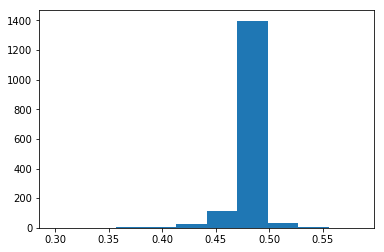

In [258]:
plt.hist(preds)

(array([4.000e+00, 9.000e+00, 4.400e+01, 4.660e+02, 4.217e+03, 1.484e+03,
        1.170e+02, 6.000e+00, 2.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

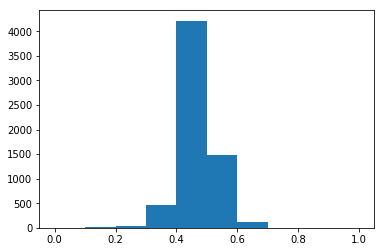

In [259]:
plt.hist(trainY)

# XGBoost

In [5]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

Must convert data into DMatrix for optimized performance

In [9]:
data_dmatrix = xgb.DMatrix(data=trainX,label=trainY)

In [13]:
data_dmatrix

In [31]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.15,
                'max_depth': 10, 'alpha': 30}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=500,early_stopping_rounds=20,metrics="mae", as_pandas=True, seed=123, verbose_eval=False)



[09:44:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[09:44:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[09:44:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[09:44:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[09:44:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[09:44:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[09:44:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[09:44:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[09:44:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[09:44:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[09:44:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[09:44:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[09:44:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[09:44:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[09:44:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=6
[09:44:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=7
[09:44:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=7
[09:44:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=7
[09:44:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=7
[09:44:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[09:44:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[09:44:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=10
[09:44:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=10
[09:44:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=10
[09:44:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=10
[09:44:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=10
[09:44:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=8
[09:44:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree prun

[09:44:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=8
[09:44:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=9
[09:44:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=10
[09:44:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=10
[09:44:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=8
[09:44:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=10
[09:44:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree prunin

,test-mae-mean,test-mae-std,train-mae-mean,train-mae-std
38,0.963698,0.014354,0.917703,0.002772


In [30]:
cv_results[-1:]

,test-mae-mean,test-mae-std,train-mae-mean,train-mae-std
38,0.963698,0.014354,0.917703,0.002772


In [4]:
train_X, val_X, labels_train, labels_val = train_test_split(trainX, trainY, test_size = 0.25, random_state = 42)